# Projet 9 Suite

## Importation

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from sklearn.cluster import KMeans 
from sklearn import cluster, metrics 
from scipy.cluster.hierarchy import ward, fcluster

In [150]:
# importation des données
df_final= pd.read_csv("poulet_nettoyage.csv", sep=",")
df_final.head()

,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance
0,202,Afrique du Sud,Afrique,2118000.0,78.7,24.3,3.490067e+11,57009756.0,1.37
1,3,Albanie,Europe,55000.0,23.6,69.1,1.301973e+10,2884169.0,-0.05
2,4,Algérie,Afrique,277000.0,99.3,0.7,1.700972e+11,41389189.0,2.03
3,79,Allemagne,Europe,1681000.0,90.1,50.1,3.682602e+12,82658409.0,0.56
4,7,Angola,Afrique,319000.0,13.2,86.8,1.221239e+11,29816766.0,3.33


In [151]:
# création du PIB par habitant
df_final["PIB"]=round(df_final["PIB"]/df_final["pop_2017"],2)
df_final

,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance
0,202,Afrique du Sud,Afrique,2118000.0,78.7,24.3,6121.88,57009756.0,1.37
1,3,Albanie,Europe,55000.0,23.6,69.1,4514.20,2884169.0,-0.05
2,4,Algérie,Afrique,277000.0,99.3,0.7,4109.70,41389189.0,2.03
3,79,Allemagne,Europe,1681000.0,90.1,50.1,44552.06,82658409.0,0.56
4,7,Angola,Afrique,319000.0,13.2,86.8,4095.81,29816766.0,3.33
...,...,...,...,...,...,...,...,...,...
129,59,Égypte,Afrique,1204000.0,92.9,9.1,2023.33,96442591.0,2.05
130,225,Émirats arabes unis,Asie,361000.0,13.3,119.9,40644.80,9487203.0,1.52
131,58,Équateur,AmSud,339000.0,100.3,0.0,6213.50,16785361.0,1.78
132,231,États-Unis d'Amérique,AmNord,18425000.0,118.9,0.7,60116.57,325084756.0,0.62


In [152]:
# suppression de colonnes et mise des pays en index
df_final1=df_final.drop(columns=["Code zone","Continent"],axis=1)
df_final1=df_final1.set_index("Zone")
df_final1


,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance
Zone,,,,,,
Afrique du Sud,2118000.0,78.7,24.3,6121.88,57009756.0,1.37
Albanie,55000.0,23.6,69.1,4514.20,2884169.0,-0.05
Algérie,277000.0,99.3,0.7,4109.70,41389189.0,2.03
Allemagne,1681000.0,90.1,50.1,44552.06,82658409.0,0.56
Angola,319000.0,13.2,86.8,4095.81,29816766.0,3.33
...,...,...,...,...,...,...
Égypte,1204000.0,92.9,9.1,2023.33,96442591.0,2.05
Émirats arabes unis,361000.0,13.3,119.9,40644.80,9487203.0,1.52
Équateur,339000.0,100.3,0.0,6213.50,16785361.0,1.78


## Normalisation des données

In [153]:
# normalisation des données
from sklearn import preprocessing
X=df_final1.copy()
sd=preprocessing.StandardScaler().fit(X)
X_scaled=sd.transform(X)
X_scaled

array([[ 5.06605197e-01,  6.54273647e-03, -2.66302883e-01,
        -5.04028861e-01,  4.24755073e-02,  3.10136789e-01],
       [-3.38445995e-01, -9.50044203e-01,  5.95699418e-01,
        -5.81802691e-01, -2.73115134e-01, -1.00330252e+00],
       [-2.47509803e-01,  3.64177781e-01, -7.20393381e-01,
        -6.01370959e-01, -4.86035005e-02,  9.20608581e-01],
       [ 3.27600170e-01,  2.04457276e-01,  2.30118085e-01,
         1.35508632e+00,  1.92025384e-01, -4.39078592e-01],
       [-2.30305658e-01, -1.13059782e+00,  9.36267291e-01,
        -6.02042908e-01, -1.16078952e-01,  2.12305302e+00],
       [-3.58107874e-01, -1.35976202e+00,  1.19025011e+00,
        -5.59885558e-02, -2.89375488e-01, -1.24593124e-01],
       [ 1.38764203e-01, -4.83035334e-01,  4.05212302e-01,
         2.06165774e-01, -9.69284894e-02,  7.26367556e-01],
       [ 4.42704089e-01,  5.51675765e-01, -7.26165718e-01,
        -9.25514668e-02, -3.37471352e-02, -5.98461153e-02],
       [-3.42951842e-01, -9.25738908e-01,  7.958

## Classification Hierarchique

### Dendrogramme

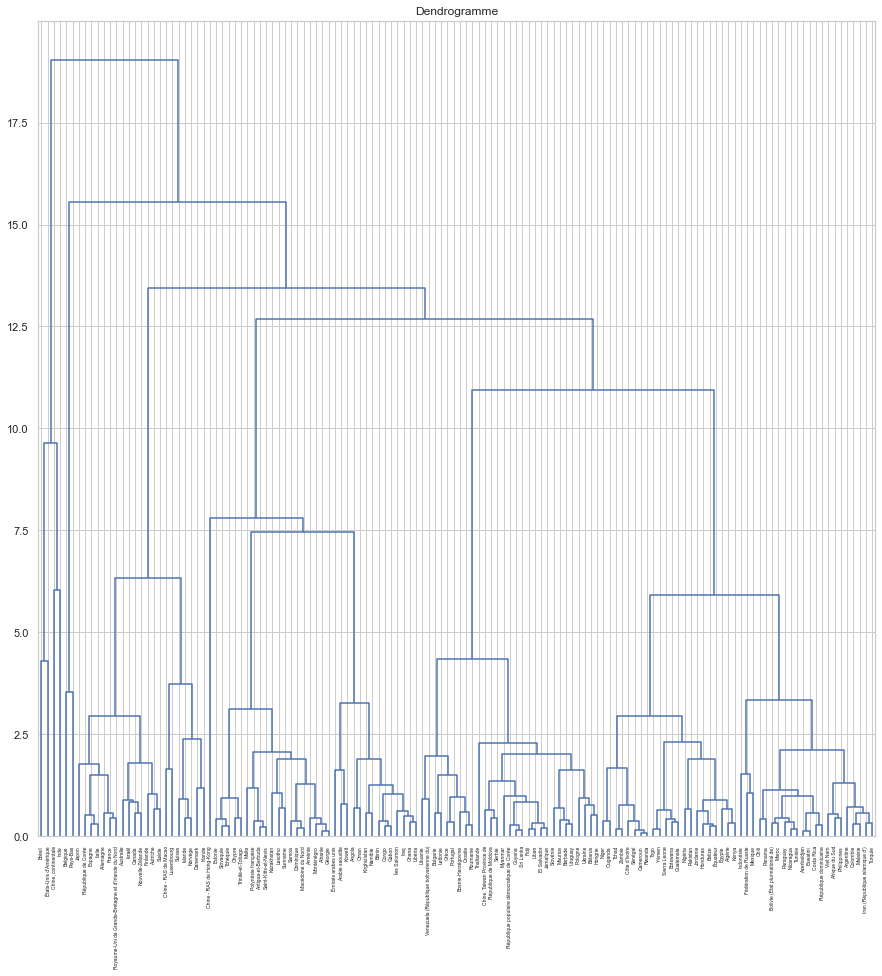

In [154]:
# création d'un dendrogramme
from scipy.cluster.hierarchy import  dendrogram, linkage
Z = linkage(X_scaled,method='ward',metric='euclidean')
plt.figure(figsize=(15,15))
plt.title("Dendrogramme")
dendrogram(Z,labels=df_final1.index,orientation='top',color_threshold=0)
plt.show()

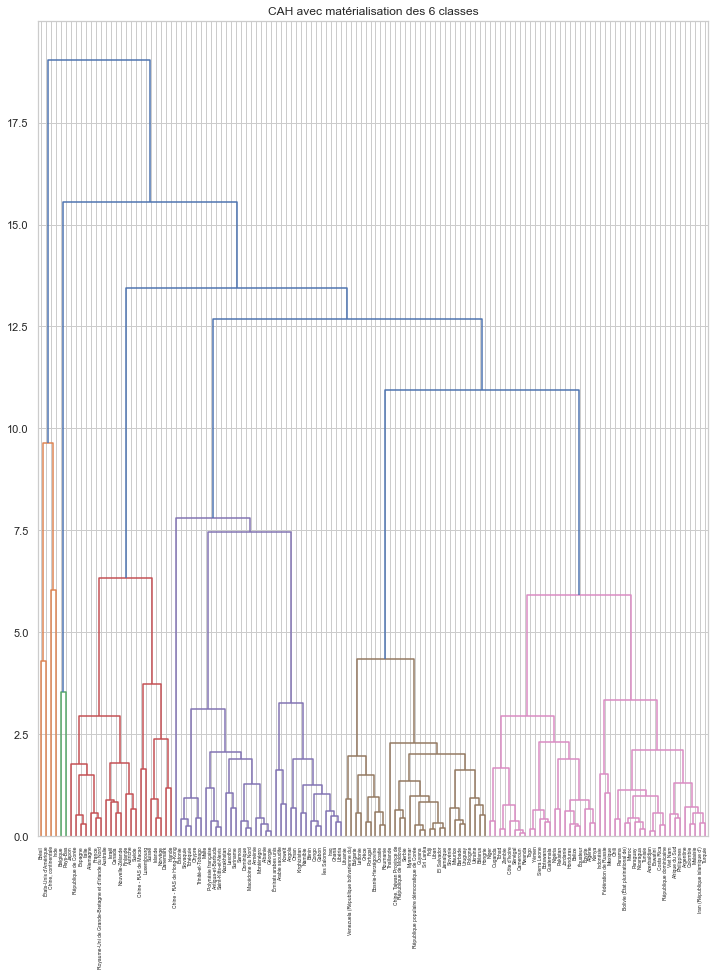

[6 4 6 3 4 4 4 6 4 3 3 6 5 2 6 6 5 6 1 5 5 4 6 3 6 4 3 5 1 4 6 4 6 5 6 3 4
 5 3 4 6 5 3 3 6 4 4 5 6 5 4 6 5 1 6 6 4 3 3 3 3 5 3 6 4 6 4 4 4 5 5 4 5 3
 4 6 4 6 5 6 4 5 4 6 6 6 3 3 4 6 6 6 6 2 6 5 4 5 5 3 6 3 5 6 5 4 4 5 6 4 5
 5 3 4 3 6 6 4 5 6 4 6 6 5 5 5 6 6 6 6 4 6 1 4]


,Zone
1,"Chine, continentale"
1,États-Unis d'Amérique
1,Inde
1,Brésil
2,Pays-Bas
...,...
6,Philippines
6,Bolivie (État plurinational de)
6,Rwanda
6,République dominicaine


In [155]:
# matérialisation de 6 classes (hauteur t = 10)
plt.figure(figsize=(12,15))
plt.title('CAH avec matérialisation des 6 classes')
dendrogram(Z,labels=df_final1.index,orientation='top',color_threshold = 10)
plt.show()
groupes_cah = fcluster(Z,t=10,criterion='distance')
print(groupes_cah)
idg = np.argsort(groupes_cah)
pd.DataFrame(df_final1.index[idg],groupes_cah[idg])

### Clusters

In [156]:
# affichage des clusters
for p in range(1,7):
    print(f"Cluster {p}:")
    print(" , ".join(df_final1.index[idg][groupes_cah[idg] == p].sort_values()))
    print(" ")

Cluster 1:
Brésil , Chine, continentale , Inde , États-Unis d'Amérique
 
Cluster 2:
Belgique , Pays-Bas
 
Cluster 3:
Allemagne , Australie , Autriche , Canada , Chine - RAS de Macao , Danemark , Espagne , Finlande , France , Irlande , Islande , Israël , Italie , Japon , Luxembourg , Norvège , Nouvelle-Zélande , Royaume-Uni de Grande-Bretagne et d'Irlande du Nord , République de Corée , Suisse , Suède
 
Cluster 4:
Albanie , Angola , Antigua-et-Barbuda , Arabie saoudite , Arménie , Bénin , Chine - RAS de Hong-Kong , Chypre , Congo , Dominique , Estonie , Gabon , Ghana , Géorgie , Iraq , Kazakhstan , Kirghizistan , Koweït , Lesotho , Libéria , Macédoine du Nord , Malte , Monténégro , Namibie , Oman , Polynésie française , Saint-Kitts-et-Nevis , Samoa , Slovaquie , Suriname , Tchéquie , Trinité-et-Tobago , Émirats arabes unis , Îles Salomon
 
Cluster 5:
Barbade , Bosnie-Herzégovine , Bulgarie , Bélarus , Chine, Taiwan Province de , Croatie , El Salvador , Fidji , Grèce , Guyana , Hongrie ,

In [157]:
# création de dataframe pour les clusters
df_cah=pd.DataFrame(df_final1.index[idg],groupes_cah[idg]).reset_index()
# changement de nom de colonne
df_cah.rename(columns={"index" : "Cluster"}, inplace=True)
df_cah

,Cluster,Zone
0,1,"Chine, continentale"
1,1,États-Unis d'Amérique
2,1,Inde
3,1,Brésil
4,2,Pays-Bas
...,...,...
129,6,Philippines
130,6,Bolivie (État plurinational de)
131,6,Rwanda
132,6,République dominicaine


In [158]:
# jointure du df final avec les données du dendrogramme
cah=pd.merge(df_final, 
df_cah, how="left", on=["Zone"])
cah

,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
0,202,Afrique du Sud,Afrique,2118000.0,78.7,24.3,6121.88,57009756.0,1.37,6
1,3,Albanie,Europe,55000.0,23.6,69.1,4514.20,2884169.0,-0.05,4
2,4,Algérie,Afrique,277000.0,99.3,0.7,4109.70,41389189.0,2.03,6
3,79,Allemagne,Europe,1681000.0,90.1,50.1,44552.06,82658409.0,0.56,3
4,7,Angola,Afrique,319000.0,13.2,86.8,4095.81,29816766.0,3.33,4
...,...,...,...,...,...,...,...,...,...,...
129,59,Égypte,Afrique,1204000.0,92.9,9.1,2023.33,96442591.0,2.05,6
130,225,Émirats arabes unis,Asie,361000.0,13.3,119.9,40644.80,9487203.0,1.52,4
131,58,Équateur,AmSud,339000.0,100.3,0.0,6213.50,16785361.0,1.78,6
132,231,États-Unis d'Amérique,AmNord,18425000.0,118.9,0.7,60116.57,325084756.0,0.62,1


In [159]:
# mise en place de df par cluster
df_groupe1_cah = cah[cah["Cluster"] == 1]
df_groupe2_cah = cah[cah["Cluster"] == 2]
df_groupe3_cah = cah[cah["Cluster"] == 3]
df_groupe4_cah = cah[cah["Cluster"] == 4]
df_groupe5_cah = cah[cah["Cluster"] == 5]
df_groupe6_cah = cah[cah["Cluster"] == 6]

In [160]:
# moyenne des clusters
cah.groupby("Cluster").mean()

,Code zone,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance
Cluster,,,,,,,
1,98.250000,1.247250e+07,116.450000,0.800000,20166.615000,8.231543e+08,0.730000
2,202.500000,1.735000e+05,430.950000,267.750000,46504.855000,1.422055e+07,0.385000
3,119.904762,8.877619e+05,79.438095,32.985714,54440.603333,2.973495e+07,0.730476
4,116.617647,1.445588e+05,25.061765,86.279412,12218.250882,7.111140e+06,1.257647
5,129.103448,3.629655e+05,93.589655,16.024138,9431.090690,1.453543e+07,-0.131034
6,126.750000,7.673864e+05,89.390909,10.936364,4786.645909,4.668970e+07,1.833182


#### Cluster 1

In [161]:
# cluster 1
print(f"Il y a {len(df_groupe1_cah)} pays dans le cluster 1")
df_groupe1_cah

Il y a 4 pays dans le cluster 1


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
18,21,Brésil,AmSud,9981000.0,142.3,0.0,9925.42,2.078338e+08,0.79,1
28,41,"Chine, continentale",Asie,18062000.0,101.0,2.5,8663.13,1.421022e+09,0.47,1
53,100,Inde,Asie,3422000.0,103.6,0.0,1961.34,1.338677e+09,1.04,1
132,231,États-Unis d'Amérique,AmNord,18425000.0,118.9,0.7,60116.57,3.250848e+08,0.62,1


In [162]:
# analyse du cluster
df_groupe1_cah.describe()

,Code zone,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
count,4.000000,4.000000e+00,4.000000,4.000000,4.000000,4.000000e+00,4.00000,4.0
mean,98.250000,1.247250e+07,116.450000,0.800000,20166.615000,8.231543e+08,0.73000,1.0
std,94.640988,7.183172e+06,18.956529,1.180395,26861.640459,6.454718e+08,0.24454,0.0
min,21.000000,3.422000e+06,101.000000,0.000000,1961.340000,2.078338e+08,0.47000,1.0
25%,36.000000,8.341250e+06,102.950000,0.000000,6987.682500,2.957720e+08,0.58250,1.0
50%,70.500000,1.402150e+07,111.250000,0.350000,9294.275000,8.318808e+08,0.70500,1.0
75%,132.750000,1.815275e+07,124.750000,1.150000,22473.207500,1.359263e+09,0.85250,1.0
max,231.000000,1.842500e+07,142.300000,2.500000,60116.570000,1.421022e+09,1.04000,1.0


In [163]:
print(f"le Cluster 1 est crée de quatres pays, des pays très peuplés. Ils importent peu de viandes de volailles, ces pays représentent un très gros marché en terme de population mais très difficile d'accès notamment à cause de leur production")

le Cluster 1 est crée de quatres pays, des pays très peuplés. Ils importent peu de viandes de volailles, ces pays représentent un très gros marché en terme de population mais très difficile d'accès notamment à cause de leur production


#### Cluster 2

In [164]:
# cluster 2
print(f"Il y a {len(df_groupe2_cah)} pays dans le cluster 2")
df_groupe2_cah

Il y a 2 pays dans le cluster 2


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
13,255,Belgique,Europe,139000.0,333.1,243.2,44020.07,11419748.0,0.55,2
93,150,Pays-Bas,Europe,208000.0,528.8,292.3,48989.64,17021347.0,0.22,2


In [165]:
# analyse du cluster
df_groupe2_cah.describe()

,Code zone,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000e+00,2.000000,2.0
mean,202.500000,173500.000000,430.950000,267.750000,46504.855000,1.422055e+07,0.385000,2.0
std,74.246212,48790.367902,138.380797,34.718943,3514.016647,3.960929e+06,0.233345,0.0
min,150.000000,139000.000000,333.100000,243.200000,44020.070000,1.141975e+07,0.220000,2.0
25%,176.250000,156250.000000,382.025000,255.475000,45262.462500,1.282015e+07,0.302500,2.0
50%,202.500000,173500.000000,430.950000,267.750000,46504.855000,1.422055e+07,0.385000,2.0
75%,228.750000,190750.000000,479.875000,280.025000,47747.247500,1.562095e+07,0.467500,2.0
max,255.000000,208000.000000,528.800000,292.300000,48989.640000,1.702135e+07,0.550000,2.0


In [166]:
print(f"Le cluster 2 concerne que 2 pays, les Pays-Bas et la Belgique, deux pays important en Europe, formant le Bénélux avec le Luxembourg. On peut voir que ces deux pays s'autosuffisent très facilement en viande de volailles, cependant ils en importent beaucoup, il y'aura donc une forte concurrence.")

Le cluster 2 concerne que 2 pays, les Pays-Bas et la Belgique, deux pays important en Europe, formant le Bénélux avec le Luxembourg. On peut voir que ces deux pays s'autosuffisent très facilement en viande de volailles, cependant ils en importent beaucoup, il y'aura donc une forte concurrence.


#### Cluster 3

In [167]:
# cluster 3
print(f"Il y a {len(df_groupe3_cah)} pays dans le cluster 3")
df_groupe3_cah

Il y a 21 pays dans le cluster 3


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
3,79,Allemagne,Europe,1681000.0,90.1,50.1,44552.06,82658409.0,0.56,3
9,10,Australie,Oceanie,1314000.0,96.6,1.2,57628.86,24584620.0,1.28,3
10,11,Autriche,Europe,188000.0,78.7,58.5,47306.41,8819901.0,0.81,3
23,33,Canada,AmNord,1439000.0,98.5,12.6,44906.75,36732095.0,0.93,3
26,128,Chine - RAS de Macao,Asie,34000.0,8.8,67.6,81516.66,622585.0,1.45,3
35,54,Danemark,Europe,167000.0,103.6,79.6,57938.80,5732274.0,0.35,3
38,203,Espagne,Europe,1519000.0,99.7,13.5,28137.44,46647428.0,0.10,3
42,67,Finlande,Europe,155000.0,83.2,10.3,46310.12,5511371.0,0.20,3
43,68,France,Europe,1938000.0,90.3,26.1,40022.37,64842509.0,0.23,3
57,104,Irlande,Europe,104000.0,105.8,95.2,71391.01,4753279.0,1.38,3


In [168]:
# analyse du cluster
df_groupe3_cah.describe()

,Code zone,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
count,21.000000,2.100000e+01,21.000000,21.000000,21.000000,2.100000e+01,21.000000,21.0
mean,119.904762,8.877619e+05,79.438095,32.985714,54440.603333,2.973495e+07,0.730476,3.0
std,71.097753,1.040696e+06,28.901392,32.432010,20627.838328,3.467919e+07,0.595017,0.0
min,10.000000,1.000000e+04,0.000000,0.000000,28137.440000,3.343930e+05,-0.240000,3.0
25%,68.000000,1.430000e+05,76.900000,10.300000,40022.370000,5.296326e+06,0.230000,3.0
50%,106.000000,2.490000e+05,90.100000,25.900000,46310.120000,8.819901e+06,0.690000,3.0
75%,162.000000,1.439000e+06,98.500000,50.100000,71391.010000,5.109642e+07,0.930000,3.0
max,256.000000,4.133000e+06,105.800000,110.000000,108431.930000,1.275027e+08,2.080000,3.0


In [169]:
# répartition des continents
df_groupe3_cah["Continent"].value_counts()

Europe     15
Asie        3
Oceanie     2
AmNord      1
Name: Continent, dtype: int64

In [170]:
print(f"Le cluster 3 concerne  21 pays, principalement en Europe. Leur  PIB est élevé, leur taux d'importation en viande de volailles est correct malgré leur forte disposition intérieure. Ces pays peuvent être intéressant notamment par la proximité avec la France.")

Le cluster 3 concerne  21 pays, principalement en Europe. Leur  PIB est élevé, leur taux d'importation en viande de volailles est correct malgré leur forte disposition intérieure. Ces pays peuvent être intéressant notamment par la proximité avec la France.


#### Cluster 4

In [171]:
# cluster 4
print(f"Il y a {len(df_groupe4_cah)} pays dans le cluster 4")
df_groupe4_cah.sort_values(by="Continent", ascending=True)

Il y a 34 pays dans le cluster 4


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
45,74,Gabon,Afrique,82000.0,4.9,92.7,7230.39,2064823.0,2.64,4
71,123,Libéria,Afrique,75000.0,20.0,64.0,587.59,4702226.0,2.48,4
68,122,Lesotho,Afrique,18000.0,11.1,83.3,1149.15,2091534.0,0.80,4
46,81,Ghana,Afrique,211000.0,28.4,71.6,2025.82,29121465.0,2.22,4
31,46,Congo,Afrique,111000.0,6.3,93.7,2154.63,5110695.0,2.62,4
82,147,Namibie,Afrique,28000.0,39.3,103.6,5300.10,2402633.0,1.90,4
4,7,Angola,Afrique,319000.0,13.2,86.8,4095.81,29816766.0,3.33,4
6,194,Arabie saoudite,Afrique,1220000.0,50.5,59.2,20802.47,33101179.0,1.82,4
21,53,Bénin,Afrique,121000.0,14.9,101.7,1136.59,11175198.0,2.77,4
105,188,Saint-Kitts-et-Nevis,AmNord,4000.0,0.0,100.0,19155.43,52045.0,0.76,4


In [172]:
# répartiton des continentes
df_groupe4_cah["Continent"].value_counts()

Europe     10
Afrique     9
Asie        7
AmNord      4
Oceanie     3
AmSud       1
Name: Continent, dtype: int64

In [173]:
# analyse du cluster
df_groupe4_cah.describe()

,Code zone,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
count,34.000000,3.400000e+01,34.000000,34.000000,34.000000,3.400000e+01,34.000000,34.0
mean,116.617647,1.445588e+05,25.061765,86.279412,12218.250882,7.111140e+06,1.257647,4.0
std,76.231313,2.307624e+05,21.550941,51.958549,11601.292392,1.021706e+07,1.081122,0.0
min,1.000000,4.000000e+03,0.000000,25.000000,587.590000,5.204500e+04,-0.140000,4.0
25%,57.000000,1.950000e+04,6.225000,65.875000,4062.832500,7.719488e+05,0.277500,4.0
50%,110.500000,6.450000e+04,21.300000,81.800000,7252.530000,2.914480e+06,0.900000,4.0
75%,182.750000,1.730000e+05,37.800000,96.650000,19181.642500,7.027175e+06,2.165000,4.0
max,273.000000,1.220000e+06,66.300000,354.300000,46705.030000,3.755278e+07,3.510000,4.0


In [174]:
print(f" Le cluster 4 est un cluster regroupant tous les continents mais plus particulièrement l'Europe, l'Afrique et l'Asie.C'est le cluster avec le moins de disponibilité intérieure en viande de volailles. Ces pays ne se suffisent pas à eux même et donc doivent obligatoirement importer. Ce cluster a également un taux de croissance intéressant entre 2017 et 2018. Ce cluster est donc intéressant pour exporter.")

 Le cluster 4 est un cluster regroupant tous les continents mais plus particulièrement l'Europe, l'Afrique et l'Asie.C'est le cluster avec le moins de disponibilité intérieure en viande de volailles. Ces pays ne se suffisent pas à eux même et donc doivent obligatoirement importer. Ce cluster a également un taux de croissance intéressant entre 2017 et 2018. Ce cluster est donc intéressant pour exporter.


#### Cluster 5

In [175]:
# cluster 5
print(f"Il y a {len(df_groupe5_cah)} pays dans le cluster 5")
df_groupe5_cah.sort_values(by="Continent", ascending=True)

Il y a 29 pays dans le cluster 5


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
78,137,Maurice,Afrique,50000.0,96.0,4.0,10485.85,1264499.0,0.21,5
12,14,Barbade,AmNord,17000.0,88.2,11.8,17392.01,286232.0,0.14,5
61,109,Jamaïque,AmNord,165000.0,77.6,18.8,5070.10,2920848.0,0.48,5
37,60,El Salvador,AmNord,170000.0,80.0,9.4,3910.25,6388126.0,0.51,5
124,234,Uruguay,AmSud,33000.0,100.0,9.1,17322.17,3436641.0,0.37,5
49,91,Guyana,AmSud,30000.0,103.3,0.0,6124.92,775222.0,0.49,5
125,236,Venezuela (République bolivarienne du),AmSud,624000.0,96.2,4.0,8429.07,29402484.0,-1.75,5
27,214,"Chine, Taiwan Province de",Asie,825000.0,79.0,19.5,0.02,23674546.0,0.22,5
118,216,Thaïlande,Asie,883000.0,189.8,0.2,6578.19,69209810.0,0.32,5
111,38,Sri Lanka,Asie,189000.0,101.6,0.0,4138.02,21128032.0,0.48,5


In [176]:
# répartition des continents
df_groupe5_cah["Continent"].value_counts()

Europe     15
Asie        6
AmSud       3
AmNord      3
Oceanie     1
Afrique     1
Name: Continent, dtype: int64

In [177]:
# analyse du cluster
df_groupe5_cah.describe()

,Code zone,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
count,29.000000,2.900000e+01,29.000000,29.000000,29.000000,2.900000e+01,29.000000,29.0
mean,129.103448,3.629655e+05,93.589655,16.024138,9431.090690,1.453543e+07,-0.131034,5.0
std,71.845740,4.562461e+05,27.742159,15.599259,6560.958696,1.746284e+07,0.653940,0.0
min,14.000000,1.700000e+04,45.800000,0.000000,0.020000,2.862320e+05,-1.750000,5.0
25%,80.000000,7.200000e+04,77.600000,4.000000,5003.500000,2.920848e+06,-0.540000,5.0
50%,119.000000,1.650000e+05,94.400000,13.300000,7792.600000,7.102444e+06,0.030000,5.0
75%,183.000000,4.730000e+05,101.600000,19.500000,14693.140000,2.112803e+07,0.470000,5.0
max,272.000000,1.664000e+06,189.800000,59.700000,23399.510000,6.920981e+07,0.690000,5.0


In [178]:
print("Le cluster 5 est également présent sur tous les continents, principalement en Europe. Ce cluster s'auto suffit en alimentation de volailles et importent peu, leur taux de croissance diminue.") 

Le cluster 5 est également présent sur tous les continents, principalement en Europe. Ce cluster s'auto suffit en alimentation de volailles et importent peu, leur taux de croissance diminue.


#### Cluster 6

In [179]:
# cluster 6
print(f"Il y a {len(df_groupe6_cah)} pays dans le cluster 6")
df_groupe6_cah.sort_values(by="Continent", ascending=True)

Il y a 44 pays dans le cluster 6


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
0,202,Afrique du Sud,Afrique,2118000.0,78.7,24.3,6121.88,57009756.0,1.37,6
128,251,Zambie,Afrique,60000.0,81.7,20.0,1534.87,16853599.0,2.96,6
121,222,Tunisie,Afrique,224000.0,95.1,0.0,3481.20,11433443.0,1.15,6
119,217,Togo,Afrique,57000.0,70.2,28.1,830.75,7698474.0,2.48,6
116,39,Tchad,Afrique,7000.0,85.7,14.3,692.16,15016753.0,3.07,6
115,195,Sénégal,Afrique,77000.0,100.0,0.0,1361.70,15419355.0,2.82,6
108,197,Sierra Leone,Afrique,31000.0,54.8,45.2,499.38,7488423.0,2.16,6
100,184,Rwanda,Afrique,19000.0,100.0,0.0,772.29,11980961.0,2.68,6
89,226,Ouganda,Afrique,65000.0,100.0,0.0,658.67,41166588.0,3.80,6
85,159,Nigéria,Afrique,201000.0,100.0,0.0,1968.69,190873244.0,2.62,6


In [180]:
# répartition des continents
df_groupe6_cah["Continent"].value_counts()

Afrique    19
AmSud       9
Asie        8
AmNord      5
Europe      3
Name: Continent, dtype: int64

In [181]:
# analyse du cluster
df_groupe6_cah.describe()

,Code zone,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
count,44.000000,4.400000e+01,44.000000,44.000000,44.000000,4.400000e+01,44.000000,44.0
mean,126.750000,7.673864e+05,89.390909,10.936364,4786.645909,4.668970e+07,1.833182,6.0
std,75.018176,1.071055e+06,13.337233,12.466272,4124.307658,5.980714e+07,0.784349,0.0
min,4.000000,7.000000e+03,54.800000,0.000000,499.380000,3.757690e+05,0.140000,6.0
25%,55.000000,6.375000e+04,81.650000,0.200000,1562.980000,9.830451e+06,1.260000,6.0
50%,134.500000,2.445000e+05,91.150000,5.450000,3659.390000,2.003641e+07,1.695000,6.0
75%,187.500000,1.226500e+06,100.000000,20.075000,6254.302500,5.191830e+07,2.345000,6.0
max,251.000000,4.554000e+06,118.000000,45.200000,15146.390000,2.646510e+08,3.890000,6.0


In [182]:
print(f"Le dernier cluster esr le plus grand et se trouve principalement en Afrique, ces pays ont une forte disponibilité intérieure en viandes de volailles, ils importent peu. Le taux de croissance est très intéressant mais il y'aurait beaucoup de travail pour importer.")

Le dernier cluster esr le plus grand et se trouve principalement en Afrique, ces pays ont une forte disponibilité intérieure en viandes de volailles, ils importent peu. Le taux de croissance est très intéressant mais il y'aurait beaucoup de travail pour importer.


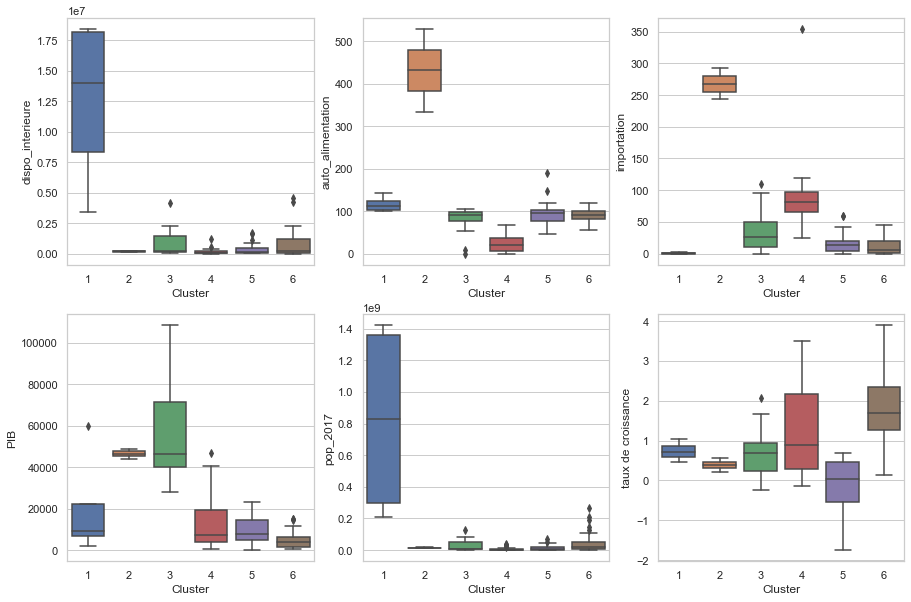

In [183]:
plt.figure(figsize=[15,10])
sns.set(style="whitegrid")

plt.subplot(231)
sns.boxplot(x="Cluster", y="dispo_interieure", data=cah)

plt.subplot(232)
sns.boxplot(x="Cluster", y="auto_alimentation", data=cah)

plt.subplot(233)
sns.boxplot(x="Cluster", y="importation", data=cah)

plt.subplot(234)
sns.boxplot(x="Cluster", y="PIB", data=cah)

plt.subplot(235)
sns.boxplot(x="Cluster", y="pop_2017", data=cah)

plt.subplot(236)
sns.boxplot(x="Cluster", y="taux de croissance", data=cah)

plt.show(block=False)

In [184]:
print(f"La disponibilité interieure est bien plus élevé dans le cluster 1, avec une très grosse intervalle, le 3,4,5,6 ont une disponibilité très proche")
print(f"Le cluster 2 se détache largement concernant l'auto alimentation, le cluster 4 est le plus bas, les autres sont proches les un des autres")
print(f" Le cluster 2 domine nettement les importations, le 4 arrive en deuxième position avec un énorme outlier")
print(f" le PIB  est le plus élevé dans le cluster 3 avec une grande intervalle puis dans le 2, les autres sont proches les uns des autres")
print(f" On voit le cluster 1 avec une énorme intervalle se détacher concernant la populatin par rapport aux autres")
print(f" C'est dans le taux de croissance où il y a le plus d'hétérogénétité entre les clusters, le cluster 6 à la plus grande intervalle")

La disponibilité interieure est bien plus élevé dans le cluster 1, avec une très grosse intervalle, le 3,4,5,6 ont une disponibilité très proche
Le cluster 2 se détache largement concernant l'auto alimentation, le cluster 4 est le plus bas, les autres sont proches les un des autres
 Le cluster 2 domine nettement les importations, le 4 arrive en deuxième position avec un énorme outlier
 le PIB  est le plus élevé dans le cluster 3 avec une grande intervalle puis dans le 2, les autres sont proches les uns des autres
 On voit le cluster 1 avec une énorme intervalle se détacher concernant la populatin par rapport aux autres
 C'est dans le taux de croissance où il y a le plus d'hétérogénétité entre les clusters, le cluster 6 à la plus grande intervalle


## Kmeans

### Méthode du coude

C:\Users\seb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


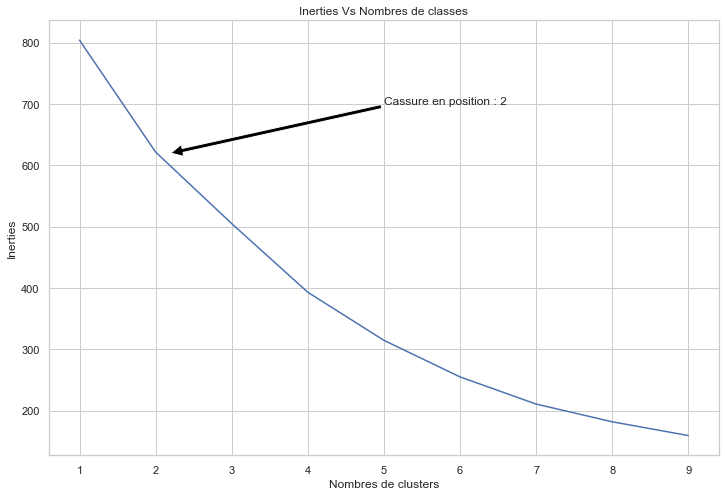

Le nombre de clusters est donc de 2 au niveau du coude.


In [185]:
# création de la méthode du coude avec une boucle pour tester les possibilités
inerties = []
for k in range (1,10) :
    kmeans = KMeans (n_clusters=k)
    kmeans.fit(X_scaled)
    
    inerties.append(kmeans.inertia_)

fig = plt.figure(figsize=(12,8))
plt.plot(range(1,10), inerties)
plt.grid(True)
plt.title("Inerties Vs Nombres de classes")
plt.xlabel("Nombres de clusters")
plt.ylabel("Inerties")

plt.annotate("Cassure en position : 2",
            xy=(2.2, 620),
            xytext=(5, 700), 
            arrowprops={'facecolor':'black'},fontsize = 12
            )
plt.show()

print('Le nombre de clusters est donc de 2 au niveau du coude.')

In [186]:
# kmean
x1 = X_scaled  
kmeans = KMeans(n_clusters = 2,init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [187]:
# affichage des centroides
Centroides1 = kmeans.cluster_centers_
Centroides1 = pd.DataFrame(Centroides1,columns= df_final1.columns)
Centroides1

,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance
0,7.318333e+05,77.959848,38.699242,16710.901136,2.957157e+07,1.038939
1,1.074200e+07,102.300000,1.250000,5312.235000,1.379849e+09,0.755000


In [188]:
# affichage des clusters
Cluster_10 = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
Cluster_20 = pd.DataFrame(X_scaled,columns= df_final1.columns)
Cluster10 = pd.concat([Cluster_10 ,Cluster_20],axis = 1)
Cluster10.index=df_final1.index
Cluster10

,Cluster,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance
Zone,,,,,,,
Afrique du Sud,0,0.506605,0.006543,-0.266303,-0.504029,0.042476,0.310137
Albanie,0,-0.338446,-0.950044,0.595699,-0.581803,-0.273115,-1.003303
Algérie,0,-0.247510,0.364178,-0.720393,-0.601371,-0.048604,0.920609
Allemagne,0,0.327600,0.204457,0.230118,1.355086,0.192025,-0.439079
Angola,0,-0.230306,-1.130598,0.936267,-0.602043,-0.116079,2.123053
...,...,...,...,...,...,...,...
Égypte,0,0.132210,0.253068,-0.558768,-0.702302,0.272397,0.939108
Émirats arabes unis,0,-0.213102,-1.128862,1.573148,1.166067,-0.234615,0.448880
Équateur,0,-0.222113,0.381539,-0.733862,-0.499597,-0.192061,0.689369


In [189]:
# affichage des 2 clusters
for m in range(0,2):
    print(f"Cluster {m}:")
    print(" , ".join(df_final1.index[Cluster10["Cluster"] == m].sort_values()))
    print(" ")

Cluster 0:
Afrique du Sud , Albanie , Algérie , Allemagne , Angola , Antigua-et-Barbuda , Arabie saoudite , Argentine , Arménie , Australie , Autriche , Azerbaïdjan , Barbade , Belgique , Belize , Bolivie (État plurinational de) , Bosnie-Herzégovine , Botswana , Brésil , Bulgarie , Bélarus , Bénin , Cameroun , Canada , Chili , Chine - RAS de Hong-Kong , Chine - RAS de Macao , Chine, Taiwan Province de , Chypre , Colombie , Congo , Costa Rica , Croatie , Côte d'Ivoire , Danemark , Dominique , El Salvador , Espagne , Estonie , Eswatini , Fidji , Finlande , France , Fédération de Russie , Gabon , Ghana , Grèce , Guatemala , Guyana , Géorgie , Honduras , Hongrie , Indonésie , Iran (République islamique d') , Iraq , Irlande , Islande , Israël , Italie , Jamaïque , Japon , Jordanie , Kazakhstan , Kenya , Kirghizistan , Koweït , Lesotho , Lettonie , Liban , Libéria , Lituanie , Luxembourg , Macédoine du Nord , Malaisie , Malte , Maroc , Maurice , Mexique , Monténégro , Myanmar , Namibie , Nic

In [190]:
# df des clusters
c_kmean1=pd.DataFrame(df_final1.index,Cluster10["Cluster"]).reset_index()
c_kmean1

,Cluster,Zone
0,0,Afrique du Sud
1,0,Albanie
2,0,Algérie
3,0,Allemagne
4,0,Angola
...,...,...
129,0,Égypte
130,0,Émirats arabes unis
131,0,Équateur
132,0,États-Unis d'Amérique


#### La séparation en 2 clusters n'est pas intéressante car cela est mal réparti et regroupe trop de pays dans le premier cluster

C:\Users\seb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


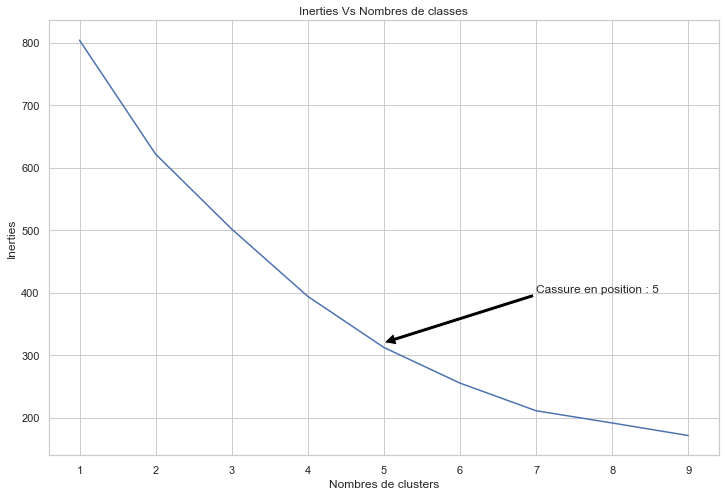

Le nombre de clusters est donc de 4 au niveau du coude.


In [191]:
# méthode du coude
inerties = []

for k in range (1,10) :
    
    kmeans = KMeans (n_clusters=k)
    kmeans.fit(X_scaled)

    inerties.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(12,8))
plt.plot(range(1,10), inerties)
plt.grid(True)
plt.title("Inerties Vs Nombres de classes")
plt.xlabel("Nombres de clusters")
plt.ylabel("Inerties")

plt.annotate("Cassure en position : 5",
            xy=(5, 320),
            xytext=(7, 400), 
            arrowprops={'facecolor':'black'},fontsize = 12
            )
plt.show()
print('Le nombre de clusters est donc de 4 au niveau du coude.')

In [192]:
# kmean
x = X_scaled 
kmeans = KMeans(n_clusters = 5,init = 'k-means++')

y_kmeans = kmeans.fit_predict(x)

In [193]:
# affichage des centroides
Centroides = kmeans.cluster_centers_
Centroides = pd.DataFrame(Centroides,columns= df_final1.columns)
Centroides.reset_index(inplace=True)
Centroides

,index,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance
0,0,-0.046139,-0.134428,0.356436,1.953283,-0.149176,-0.143555
1,1,-0.059419,-0.093488,-0.183811,-0.549524,-0.050839,0.922795
2,2,5.088233,0.512324,-0.713338,0.340550,5.705561,-0.300335
3,3,-0.289906,6.121928,4.417948,1.449556,-0.207016,-0.600946
4,4,-0.194335,-0.110193,-0.068796,-0.236345,-0.202277,-0.847773


In [194]:
# df avec cluster
Cluster_1 = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
Cluster_2 = pd.DataFrame(X_scaled,columns= df_final1.columns)
Cluster = pd.concat([Cluster_1 ,Cluster_2],axis = 1)
Cluster.index=df_final1.index
Cluster

,Cluster,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance
Zone,,,,,,,
Afrique du Sud,1,0.506605,0.006543,-0.266303,-0.504029,0.042476,0.310137
Albanie,4,-0.338446,-0.950044,0.595699,-0.581803,-0.273115,-1.003303
Algérie,1,-0.247510,0.364178,-0.720393,-0.601371,-0.048604,0.920609
Allemagne,0,0.327600,0.204457,0.230118,1.355086,0.192025,-0.439079
Angola,1,-0.230306,-1.130598,0.936267,-0.602043,-0.116079,2.123053
...,...,...,...,...,...,...,...
Égypte,1,0.132210,0.253068,-0.558768,-0.702302,0.272397,0.939108
Émirats arabes unis,0,-0.213102,-1.128862,1.573148,1.166067,-0.234615,0.448880
Équateur,1,-0.222113,0.381539,-0.733862,-0.499597,-0.192061,0.689369


In [195]:
# affichage des clusters
c_kmean=pd.DataFrame(df_final1.index,Cluster["Cluster"]).reset_index()
c_kmean

,Cluster,Zone
0,1,Afrique du Sud
1,4,Albanie
2,1,Algérie
3,0,Allemagne
4,1,Angola
...,...,...
129,1,Égypte
130,0,Émirats arabes unis
131,1,Équateur
132,2,États-Unis d'Amérique


### Clusters

In [196]:
# affichage des clusters
for km in range(0,5):
    print(f"Cluster {km}:")
    print(" , ".join(df_final1.index[Cluster["Cluster"] == km].sort_values()))
    print(" ")

Cluster 0:
Allemagne , Australie , Autriche , Canada , Chine - RAS de Hong-Kong , Chine - RAS de Macao , Danemark , Finlande , France , Irlande , Islande , Israël , Japon , Luxembourg , Norvège , Nouvelle-Zélande , Royaume-Uni de Grande-Bretagne et d'Irlande du Nord , Suisse , Suède , Émirats arabes unis
 
Cluster 1:
Afrique du Sud , Algérie , Angola , Arabie saoudite , Azerbaïdjan , Belize , Bolivie (État plurinational de) , Botswana , Brésil , Bénin , Cameroun , Chili , Colombie , Congo , Côte d'Ivoire , Gabon , Ghana , Guatemala , Honduras , Indonésie , Iran (République islamique d') , Iraq , Jordanie , Kazakhstan , Kenya , Kirghizistan , Koweït , Libéria , Malaisie , Maroc , Mexique , Namibie , Nicaragua , Niger , Nigéria , Oman , Ouganda , Pakistan , Panama , Paraguay , Philippines , Rwanda , République dominicaine , Sierra Leone , Sénégal , Tchad , Togo , Tunisie , Turquie , Viet Nam , Yémen , Zambie , Égypte , Équateur , Îles Salomon
 
Cluster 2:
Chine, continentale , Inde , Éta

In [197]:
# jointure du df avec les clusters
df_kmean=pd.merge(df_final, 
c_kmean, how="left", on=["Zone"])
df_kmean

,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
0,202,Afrique du Sud,Afrique,2118000.0,78.7,24.3,6121.88,57009756.0,1.37,1
1,3,Albanie,Europe,55000.0,23.6,69.1,4514.20,2884169.0,-0.05,4
2,4,Algérie,Afrique,277000.0,99.3,0.7,4109.70,41389189.0,2.03,1
3,79,Allemagne,Europe,1681000.0,90.1,50.1,44552.06,82658409.0,0.56,0
4,7,Angola,Afrique,319000.0,13.2,86.8,4095.81,29816766.0,3.33,1
...,...,...,...,...,...,...,...,...,...,...
129,59,Égypte,Afrique,1204000.0,92.9,9.1,2023.33,96442591.0,2.05,1
130,225,Émirats arabes unis,Asie,361000.0,13.3,119.9,40644.80,9487203.0,1.52,0
131,58,Équateur,AmSud,339000.0,100.3,0.0,6213.50,16785361.0,1.78,1
132,231,États-Unis d'Amérique,AmNord,18425000.0,118.9,0.7,60116.57,325084756.0,0.62,2


In [199]:
# moyenne des clusters
df_kmean.groupby("Cluster").mean()

,Code zone,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance
Cluster,,,,,,,
0,120.650000,7.686000e+05,70.580000,56.665000,56917.519500,2.414050e+07,0.879500
1,119.272727,7.361818e+05,72.938182,28.587273,5181.446545,4.100571e+07,2.032364
2,124.000000,1.330300e+07,107.833333,1.066667,23580.346667,1.028261e+09,0.710000
3,202.500000,1.735000e+05,430.950000,267.750000,46504.855000,1.422055e+07,0.385000
4,126.888889,4.068148e+05,71.975926,34.564815,11655.235556,1.503327e+07,0.118148


In [200]:
# mise en place de df par cluster
df_groupe1_kmean= df_kmean[df_kmean["Cluster"] == 0]
df_groupe2_kmean= df_kmean[df_kmean["Cluster"] == 1]
df_groupe3_kmean= df_kmean[df_kmean["Cluster"] == 2]
df_groupe4_kmean= df_kmean[df_kmean["Cluster"] == 3]
df_groupe5_kmean= df_kmean[df_kmean["Cluster"] == 4]

#### Cluster 1

In [201]:
print(f"Il y a {len(df_groupe1_kmean)} pays dans le cluster 1")
df_groupe1_kmean.sort_values(by="Continent", ascending=True)

Il y a 20 pays dans le cluster 1


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
23,33,Canada,AmNord,1439000.0,98.5,12.6,44906.75,36732095.0,0.93,0
130,225,Émirats arabes unis,Asie,361000.0,13.3,119.9,40644.80,9487203.0,1.52,0
25,96,Chine - RAS de Hong-Kong,Asie,256000.0,9.4,354.3,46705.03,7306322.0,0.90,0
26,128,Chine - RAS de Macao,Asie,34000.0,8.8,67.6,81516.66,622585.0,1.45,0
62,110,Japon,Asie,4133000.0,53.6,25.9,38170.67,127502725.0,-0.24,0
112,211,Suisse,Europe,143000.0,63.6,35.7,83313.01,8455804.0,0.83,0
99,229,Royaume-Uni de Grande-Bretagne et d'Irlande du...,Europe,2234000.0,81.2,34.9,39900.87,66727461.0,0.62,0
86,162,Norvège,Europe,104000.0,97.1,1.9,75220.81,5296326.0,0.79,0
73,256,Luxembourg,Europe,10000.0,0.0,110.0,108431.93,591910.0,2.08,0
59,105,Israël,Europe,616000.0,102.1,0.0,42850.55,8243848.0,1.67,0


In [202]:
# répartition des continents
df_groupe1_kmean["Continent"].value_counts()

Europe     13
Asie        4
Oceanie     2
AmNord      1
Name: Continent, dtype: int64

In [204]:
# analyse du cluster
df_groupe1_kmean.describe()

,Code zone,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
count,20.000000,2.000000e+01,20.000000,20.000000,20.000000,2.000000e+01,20.000000,20.0
mean,120.650000,7.686000e+05,70.580000,56.665000,56917.519500,2.414050e+07,0.879500,0.0
std,74.550071,1.062738e+06,35.152519,79.198188,19116.794626,3.451958e+07,0.557131,0.0
min,10.000000,1.000000e+04,0.000000,0.000000,38170.670000,3.343930e+05,-0.240000,0.0
25%,67.750000,1.332500e+05,60.725000,12.025000,43477.587500,5.160564e+06,0.605000,0.0
50%,104.500000,2.410000e+05,82.200000,34.300000,47005.720000,8.349826e+06,0.820000,0.0
75%,174.000000,1.345250e+06,96.725000,70.600000,71851.190000,2.762149e+07,1.305000,0.0
max,256.000000,4.133000e+06,105.800000,354.300000,108431.930000,1.275027e+08,2.080000,0.0


#### Cluster 2

In [205]:
print(f"Il y a {len(df_groupe2_kmean)} pays dans le cluster 2")
df_groupe2_kmean.sort_values(by="Continent", ascending=True)

Il y a 55 pays dans le cluster 2


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
0,202,Afrique du Sud,Afrique,2118000.0,78.7,24.3,6121.88,57009756.0,1.37,1
129,59,Égypte,Afrique,1204000.0,92.9,9.1,2023.33,96442591.0,2.05,1
128,251,Zambie,Afrique,60000.0,81.7,20.0,1534.87,16853599.0,2.96,1
121,222,Tunisie,Afrique,224000.0,95.1,0.0,3481.20,11433443.0,1.15,1
119,217,Togo,Afrique,57000.0,70.2,28.1,830.75,7698474.0,2.48,1
116,39,Tchad,Afrique,7000.0,85.7,14.3,692.16,15016753.0,3.07,1
115,195,Sénégal,Afrique,77000.0,100.0,0.0,1361.70,15419355.0,2.82,1
108,197,Sierra Leone,Afrique,31000.0,54.8,45.2,499.38,7488423.0,2.16,1
100,184,Rwanda,Afrique,19000.0,100.0,0.0,772.29,11980961.0,2.68,1
89,226,Ouganda,Afrique,65000.0,100.0,0.0,658.67,41166588.0,3.80,1


In [206]:
df_groupe2_kmean.describe()

,Code zone,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
count,55.000000,5.500000e+01,55.000000,55.000000,55.000000,5.500000e+01,55.000000,55.0
mean,119.272727,7.361818e+05,72.938182,28.587273,5181.446545,4.100571e+07,2.032364,1.0
std,71.545752,1.506796e+06,34.052196,33.818804,5520.009498,5.807596e+07,0.737418,0.0
min,4.000000,7.000000e+03,0.000000,0.000000,499.380000,3.757690e+05,0.790000,1.0
25%,54.500000,6.500000e+04,52.650000,0.250000,1553.610000,7.593448e+06,1.400000,1.0
50%,113.000000,2.110000e+05,83.900000,14.300000,3481.200000,1.691497e+07,1.970000,1.0
75%,170.000000,8.065000e+05,98.450000,47.650000,6295.105000,4.127789e+07,2.605000,1.0
max,251.000000,9.981000e+06,142.300000,105.900000,29754.610000,2.646510e+08,3.890000,1.0


In [207]:
df_groupe2_kmean["Continent"].value_counts()

Afrique    26
Asie       13
AmSud       8
AmNord      5
Europe      2
Oceanie     1
Name: Continent, dtype: int64

#### Cluster 3

In [208]:
print(f"Il y a {len(df_groupe3_kmean)} pays dans le cluster 3")
df_groupe3_kmean

Il y a 3 pays dans le cluster 3


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
28,41,"Chine, continentale",Asie,18062000.0,101.0,2.5,8663.13,1.421022e+09,0.47,2
53,100,Inde,Asie,3422000.0,103.6,0.0,1961.34,1.338677e+09,1.04,2
132,231,États-Unis d'Amérique,AmNord,18425000.0,118.9,0.7,60116.57,3.250848e+08,0.62,2


In [209]:
df_groupe3_kmean.describe()

,Code zone,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
count,3.000000,3.000000e+00,3.000000,3.000000,3.000000,3.000000e+00,3.000000,3.0
mean,124.000000,1.330300e+07,107.833333,1.066667,23580.346667,1.028261e+09,0.710000,2.0
std,97.247108,8.559122e+06,9.671780,1.289703,31818.237049,6.103588e+08,0.295466,0.0
min,41.000000,3.422000e+06,101.000000,0.000000,1961.340000,3.250848e+08,0.470000,2.0
25%,70.500000,1.074200e+07,102.300000,0.350000,5312.235000,8.318808e+08,0.545000,2.0
50%,100.000000,1.806200e+07,103.600000,0.700000,8663.130000,1.338677e+09,0.620000,2.0
75%,165.500000,1.824350e+07,111.250000,1.600000,34389.850000,1.379849e+09,0.830000,2.0
max,231.000000,1.842500e+07,118.900000,2.500000,60116.570000,1.421022e+09,1.040000,2.0


#### Cluster 4

In [210]:
print(f"Il y a {len(df_groupe4_kmean)} pays dans le cluster 4")
df_groupe4_kmean.sort_values(by="Continent", ascending=True)

Il y a 2 pays dans le cluster 4


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
13,255,Belgique,Europe,139000.0,333.1,243.2,44020.07,11419748.0,0.55,3
93,150,Pays-Bas,Europe,208000.0,528.8,292.3,48989.64,17021347.0,0.22,3


In [211]:
df_groupe4_kmean["Continent"].value_counts()

Europe    2
Name: Continent, dtype: int64

In [212]:
df_groupe4_kmean.describe()

,Code zone,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000e+00,2.000000,2.0
mean,202.500000,173500.000000,430.950000,267.750000,46504.855000,1.422055e+07,0.385000,3.0
std,74.246212,48790.367902,138.380797,34.718943,3514.016647,3.960929e+06,0.233345,0.0
min,150.000000,139000.000000,333.100000,243.200000,44020.070000,1.141975e+07,0.220000,3.0
25%,176.250000,156250.000000,382.025000,255.475000,45262.462500,1.282015e+07,0.302500,3.0
50%,202.500000,173500.000000,430.950000,267.750000,46504.855000,1.422055e+07,0.385000,3.0
75%,228.750000,190750.000000,479.875000,280.025000,47747.247500,1.562095e+07,0.467500,3.0
max,255.000000,208000.000000,528.800000,292.300000,48989.640000,1.702135e+07,0.550000,3.0


#### Cluster 5

In [213]:
print(f"Il y a {len(df_groupe5_kmean)} pays dans le cluster 5")
df_groupe5_kmean.sort_values(by="Continent", ascending=True)

Il y a 54 pays dans le cluster 5


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
78,137,Maurice,Afrique,50000.0,96.0,4.0,10485.85,1264499.0,0.21,4
68,122,Lesotho,Afrique,18000.0,11.1,83.3,1149.15,2091534.0,0.80,4
40,209,Eswatini,Afrique,8000.0,75.0,25.0,3952.91,1124805.0,1.02,4
5,8,Antigua-et-Barbuda,AmNord,7000.0,0.0,100.0,15383.42,95426.0,0.90,4
12,14,Barbade,AmNord,17000.0,88.2,11.8,17392.01,286232.0,0.14,4
120,220,Trinité-et-Tobago,AmNord,92000.0,66.3,25.0,16173.65,1384059.0,0.42,4
61,109,Jamaïque,AmNord,165000.0,77.6,18.8,5070.10,2920848.0,0.48,4
105,188,Saint-Kitts-et-Nevis,AmNord,4000.0,0.0,100.0,19155.43,52045.0,0.76,4
37,60,El Salvador,AmNord,170000.0,80.0,9.4,3910.25,6388126.0,0.51,4
36,55,Dominique,AmNord,4000.0,0.0,100.0,7274.67,71458.0,0.23,4


In [214]:
df_groupe5_kmean["Continent"].value_counts()

Europe     28
Asie        7
AmNord      7
AmSud       6
Oceanie     3
Afrique     3
Name: Continent, dtype: int64

In [215]:
df_groupe5_kmean.describe()

,Code zone,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
count,54.000000,5.400000e+01,54.000000,54.000000,54.000000,5.400000e+01,54.000000,54.0
mean,126.888889,4.068148e+05,71.975926,34.564815,11655.235556,1.503327e+07,0.118148,4.0
std,76.402279,7.594102e+05,39.545889,32.985063,8351.022182,2.542317e+07,0.604777,0.0
min,1.000000,4.000000e+03,0.000000,0.000000,0.020000,5.204500e+04,-1.750000,4.0
25%,63.750000,3.225000e+04,49.900000,9.700000,5020.150000,1.278222e+06,-0.125000,4.0
50%,120.000000,8.250000e+04,77.450000,19.300000,9457.460000,4.034200e+06,0.215000,4.0
75%,195.500000,4.147500e+05,99.175000,61.050000,17374.550000,1.740074e+07,0.487500,4.0
max,273.000000,4.554000e+06,189.800000,100.000000,32333.550000,1.455301e+08,1.020000,4.0


#### Nous pouvons détermniner 5 clusters mais nous allons voir une autre méthode possible pour déterminer le nombre de clusters.

### Coefficient de silhouette

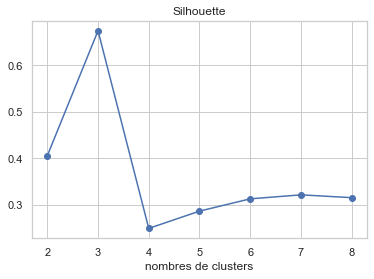

In [216]:
silhouettes=[]
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
for k in range(2,9):
    cs = cluster.KMeans(n_clusters=k)
    cs.fit(X_scaled)
    silh = metrics.silhouette_score(X_scaled, cs.labels_)
    silhouettes.append(silh)
#print(res)

plt.title("Silhouette")
plt.xlabel("nombres de clusters")
plt.plot(range(2,9),silhouettes,marker="o")
plt.show()


#### Nous allons prendre k=6 afin de pouvoir comparer par la suite avec le dendrogramme, la courbe augmente et commence a se stabilisé au niveau du 6, le k idéal serait 4

In [217]:
# kmean
x1 = X_scaled 
kmeans1 = KMeans(n_clusters = 6,init = 'k-means++')

y_kmeans1 = kmeans1.fit_predict(x)

In [218]:
# affichage des centroides
Centroides_s = kmeans1.cluster_centers_
Centroides_s = pd.DataFrame(Centroides_s,columns= df_final1.columns)
Centroides_s.reset_index(inplace=True)
Centroides_s

,index,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance
0,0,-0.129002,0.105169,-0.297730,-0.195553,-0.167699,-1.002422
1,1,-0.105033,0.003888,-0.017187,2.081999,-0.173827,-0.118608
2,2,-0.289906,6.121928,4.417948,1.449556,-0.207016,-0.600946
3,3,0.003887,0.209784,-0.525621,-0.569629,-0.009441,0.752224
4,4,-0.294317,-1.057482,1.124164,-0.232226,-0.241876,0.504734
5,5,5.088233,0.512324,-0.713338,0.340550,5.705561,-0.300335


In [219]:
# df avec cluster
Cluster_1s = pd.DataFrame(kmeans1.labels_,columns=['Cluster'])
Cluster_2s = pd.DataFrame(X_scaled,columns= df_final1.columns)
Cluster_s = pd.concat([Cluster_1s ,Cluster_2s],axis = 1)
Cluster_s.index=df_final1.index
Cluster_s

,Cluster,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance
Zone,,,,,,,
Afrique du Sud,3,0.506605,0.006543,-0.266303,-0.504029,0.042476,0.310137
Albanie,0,-0.338446,-0.950044,0.595699,-0.581803,-0.273115,-1.003303
Algérie,3,-0.247510,0.364178,-0.720393,-0.601371,-0.048604,0.920609
Allemagne,1,0.327600,0.204457,0.230118,1.355086,0.192025,-0.439079
Angola,4,-0.230306,-1.130598,0.936267,-0.602043,-0.116079,2.123053
...,...,...,...,...,...,...,...
Égypte,3,0.132210,0.253068,-0.558768,-0.702302,0.272397,0.939108
Émirats arabes unis,4,-0.213102,-1.128862,1.573148,1.166067,-0.234615,0.448880
Équateur,3,-0.222113,0.381539,-0.733862,-0.499597,-0.192061,0.689369


In [220]:
# changement du numéro de clusters
Cluster_s["Cluster"]=Cluster_s["Cluster"].replace(0,10)
Cluster_s["Cluster"]=Cluster_s["Cluster"].replace(1,20)
Cluster_s["Cluster"]=Cluster_s["Cluster"].replace(2,30)
Cluster_s["Cluster"]=Cluster_s["Cluster"].replace(3,40)
Cluster_s["Cluster"]=Cluster_s["Cluster"].replace(4,50)
Cluster_s["Cluster"]=Cluster_s["Cluster"].replace(5,60)

Cluster_s["Cluster"]=Cluster_s["Cluster"].replace(10,1)
Cluster_s["Cluster"]=Cluster_s["Cluster"].replace(20,2)
Cluster_s["Cluster"]=Cluster_s["Cluster"].replace(30,3)
Cluster_s["Cluster"]=Cluster_s["Cluster"].replace(40,4)
Cluster_s["Cluster"]=Cluster_s["Cluster"].replace(50,5)
Cluster_s["Cluster"]=Cluster_s["Cluster"].replace(60,6)
Cluster_s

,Cluster,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance
Zone,,,,,,,
Afrique du Sud,4,0.506605,0.006543,-0.266303,-0.504029,0.042476,0.310137
Albanie,1,-0.338446,-0.950044,0.595699,-0.581803,-0.273115,-1.003303
Algérie,4,-0.247510,0.364178,-0.720393,-0.601371,-0.048604,0.920609
Allemagne,2,0.327600,0.204457,0.230118,1.355086,0.192025,-0.439079
Angola,5,-0.230306,-1.130598,0.936267,-0.602043,-0.116079,2.123053
...,...,...,...,...,...,...,...
Égypte,4,0.132210,0.253068,-0.558768,-0.702302,0.272397,0.939108
Émirats arabes unis,5,-0.213102,-1.128862,1.573148,1.166067,-0.234615,0.448880
Équateur,4,-0.222113,0.381539,-0.733862,-0.499597,-0.192061,0.689369


In [221]:
# affichage des clusters
s_kmean=pd.DataFrame(df_final1.index,Cluster_s["Cluster"]).reset_index()
s_kmean

,Cluster,Zone
0,4,Afrique du Sud
1,1,Albanie
2,4,Algérie
3,2,Allemagne
4,5,Angola
...,...,...
129,4,Égypte
130,5,Émirats arabes unis
131,4,Équateur
132,6,États-Unis d'Amérique


### Clusters

In [222]:
# affichage des clusters
for cs in range(1,7):
    print(f"Cluster {cs}:")
    print(" , ".join(df_final1.index[Cluster_s["Cluster"] == cs].sort_values()))
    print(" ")

Cluster 1:
Albanie , Barbade , Bosnie-Herzégovine , Bulgarie , Bélarus , Chine, Taiwan Province de , Chypre , Croatie , El Salvador , Espagne , Estonie , Fidji , Fédération de Russie , Grèce , Guyana , Géorgie , Hongrie , Italie , Jamaïque , Japon , Lettonie , Liban , Lituanie , Maurice , Monténégro , Myanmar , Pologne , Portugal , Roumanie , République de Corée , République de Moldova , République populaire démocratique de Corée , Serbie , Slovaquie , Slovénie , Sri Lanka , Tchéquie , Thaïlande , Trinité-et-Tobago , Ukraine , Uruguay , Venezuela (République bolivarienne du)
 
Cluster 2:
Allemagne , Australie , Autriche , Canada , Chine - RAS de Macao , Danemark , Finlande , France , Irlande , Islande , Israël , Luxembourg , Norvège , Nouvelle-Zélande , Royaume-Uni de Grande-Bretagne et d'Irlande du Nord , Suisse , Suède
 
Cluster 3:
Belgique , Pays-Bas
 
Cluster 4:
Afrique du Sud , Algérie , Argentine , Azerbaïdjan , Belize , Bolivie (État plurinational de) , Botswana , Brésil , Camer

In [223]:
# jointure des clusters kmean et du df final
df_kmean_sil=pd.merge(df_final, 
s_kmean, how="left", on=["Zone"])
df_kmean_sil

,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
0,202,Afrique du Sud,Afrique,2118000.0,78.7,24.3,6121.88,57009756.0,1.37,4
1,3,Albanie,Europe,55000.0,23.6,69.1,4514.20,2884169.0,-0.05,1
2,4,Algérie,Afrique,277000.0,99.3,0.7,4109.70,41389189.0,2.03,4
3,79,Allemagne,Europe,1681000.0,90.1,50.1,44552.06,82658409.0,0.56,2
4,7,Angola,Afrique,319000.0,13.2,86.8,4095.81,29816766.0,3.33,5
...,...,...,...,...,...,...,...,...,...,...
129,59,Égypte,Afrique,1204000.0,92.9,9.1,2023.33,96442591.0,2.05,4
130,225,Émirats arabes unis,Asie,361000.0,13.3,119.9,40644.80,9487203.0,1.52,5
131,58,Équateur,AmSud,339000.0,100.3,0.0,6213.50,16785361.0,1.78,4
132,231,États-Unis d'Amérique,AmNord,18425000.0,118.9,0.7,60116.57,325084756.0,0.62,6


In [224]:
# mise en place de df par cluster
df_groupe1_sil = df_kmean_sil[df_kmean_sil["Cluster"] == 1]
df_groupe2_sil = df_kmean_sil[df_kmean_sil["Cluster"] == 2]
df_groupe3_sil = df_kmean_sil[df_kmean_sil["Cluster"] == 3]
df_groupe4_sil = df_kmean_sil[df_kmean_sil["Cluster"] == 4]
df_groupe5_sil = df_kmean_sil[df_kmean_sil["Cluster"] == 5]
df_groupe6_sil = df_kmean_sil[df_kmean_sil["Cluster"] == 6]

In [226]:
# description des clusters
df_kmean_sil.groupby("Cluster").mean()

,Code zone,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance
Cluster,,,,,,,
1,131.261905,5.663095e+05,84.380952,22.666667,12498.462381,2.096358e+07,-0.049048
2,116.588235,6.248235e+05,78.547059,37.247059,59578.228824,1.991257e+07,0.906471
3,202.500000,1.735000e+05,430.950000,267.750000,46504.855000,1.422055e+07,0.385000
4,123.022727,8.907273e+05,90.406818,10.822727,4765.854773,4.810569e+07,1.847955
5,112.192308,1.627308e+05,17.411538,96.565385,11740.375000,8.241779e+06,1.580385
6,124.000000,1.330300e+07,107.833333,1.066667,23580.346667,1.028261e+09,0.710000


#### Cluster 1

In [227]:
print(f"Il y a {len(df_groupe1_sil)} pays dans le cluster 1")
df_groupe1_sil.sort_values(by="Continent", ascending=True)

Il y a 42 pays dans le cluster 1


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
78,137,Maurice,Afrique,50000.0,96.0,4.0,10485.85,1264499.0,0.21,1
12,14,Barbade,AmNord,17000.0,88.2,11.8,17392.01,286232.0,0.14,1
120,220,Trinité-et-Tobago,AmNord,92000.0,66.3,25.0,16173.65,1384059.0,0.42,1
61,109,Jamaïque,AmNord,165000.0,77.6,18.8,5070.10,2920848.0,0.48,1
37,60,El Salvador,AmNord,170000.0,80.0,9.4,3910.25,6388126.0,0.51,1
125,236,Venezuela (République bolivarienne du),AmSud,624000.0,96.2,4.0,8429.07,29402484.0,-1.75,1
124,234,Uruguay,AmSud,33000.0,100.0,9.1,17322.17,3436641.0,0.37,1
49,91,Guyana,AmSud,30000.0,103.3,0.0,6124.92,775222.0,0.49,1
70,121,Liban,Asie,73000.0,87.7,17.8,7792.60,6819373.0,0.59,1
62,110,Japon,Asie,4133000.0,53.6,25.9,38170.67,127502725.0,-0.24,1


In [228]:
df_groupe1_sil["Continent"].value_counts()

Europe     25
Asie        8
AmNord      4
AmSud       3
Oceanie     1
Afrique     1
Name: Continent, dtype: int64

In [229]:
print(f"Le cluster 1 regroupe des pays réparti principalement en Europe, ces pays s'alimentent très bien en volailles par eux mêmes. Ils importent peu, le PIB par habitant est également assez bas.")

Le cluster 1 regroupe des pays réparti principalement en Europe, ces pays s'alimentent très bien en volailles par eux mêmes. Ils importent peu, le PIB par habitant est également assez bas.


#### Cluster 2

In [230]:
print(f"Il y a {len(df_groupe2_sil)} pays dans le cluster 2")
df_groupe2_sil.sort_values(by="Continent", ascending=True)

Il y a 17 pays dans le cluster 2


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
23,33,Canada,AmNord,1439000.0,98.5,12.6,44906.75,36732095.0,0.93,2
26,128,Chine - RAS de Macao,Asie,34000.0,8.8,67.6,81516.66,622585.0,1.45,2
3,79,Allemagne,Europe,1681000.0,90.1,50.1,44552.06,82658409.0,0.56,2
99,229,Royaume-Uni de Grande-Bretagne et d'Irlande du...,Europe,2234000.0,81.2,34.9,39900.87,66727461.0,0.62,2
86,162,Norvège,Europe,104000.0,97.1,1.9,75220.81,5296326.0,0.79,2
73,256,Luxembourg,Europe,10000.0,0.0,110.0,108431.93,591910.0,2.08,2
59,105,Israël,Europe,616000.0,102.1,0.0,42850.55,8243848.0,1.67,2
58,99,Islande,Europe,13000.0,76.9,15.4,73231.73,334393.0,0.69,2
57,104,Irlande,Europe,104000.0,105.8,95.2,71391.01,4753279.0,1.38,2
43,68,France,Europe,1938000.0,90.3,26.1,40022.37,64842509.0,0.23,2


In [231]:
df_groupe2_sil["Continent"].value_counts()

Europe     13
Oceanie     2
Asie        1
AmNord      1
Name: Continent, dtype: int64

In [82]:
print(f"Le cluster 2 est principalement en Europe. Ces pays arrivent assez bien à s'auto alimenter en volailles et importent moyennement.Leur PIB est très élevé avec un taux de croissace de population intéressant.") 

Le cluster 2 est principalement en Europe. Ces pays arrivent assez bien à s'auto alimenter en volailles et importent moyennement.Leur PIB est très élevé avec un taux de croissace de population intéressant.


#### Cluster 3

In [232]:
print(f"Il y a {len(df_groupe3_sil)} pays dans le cluster 3")
df_groupe3_sil.sort_values(by="Continent", ascending=True)

Il y a 2 pays dans le cluster 3


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
13,255,Belgique,Europe,139000.0,333.1,243.2,44020.07,11419748.0,0.55,3
93,150,Pays-Bas,Europe,208000.0,528.8,292.3,48989.64,17021347.0,0.22,3


In [233]:
df_groupe3_sil["Continent"].value_counts()

Europe    2
Name: Continent, dtype: int64

In [93]:
print(f"Le cluster 3 représente 2 des 3 pays du Bénélux. Leur auto suffisance alimentaire est largement dépassé et leur importation en volailles est également très importante. Leur PIB est assez élevé.")

Le cluster 6 représente 2 des 3 pays du Bénélux. Leur auto suffisance alimentaire est largement dépassé et leur importation en volailles est également très importante. Leur PIB est assez élevé.


Le cluster 3 est principalement présent en Afrique et en Asie, ces pays disposent d'une faible disponibilité interieure en volaille et n'arrivent pas à s'auto alimenter, ils importent donc énormément. C'est le cluster avec la plus petite poopulation mais le taux de croissance est très interessant.


#### Cluster 4

In [235]:
print(f"Il y a {len(df_groupe4_sil)} pays dans le cluster 4")
df_groupe4_sil.sort_values(by="Continent", ascending=True)

Il y a 44 pays dans le cluster 4


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
0,202,Afrique du Sud,Afrique,2118000.0,78.7,24.3,6121.88,57009756.0,1.37,4
128,251,Zambie,Afrique,60000.0,81.7,20.0,1534.87,16853599.0,2.96,4
121,222,Tunisie,Afrique,224000.0,95.1,0.0,3481.20,11433443.0,1.15,4
119,217,Togo,Afrique,57000.0,70.2,28.1,830.75,7698474.0,2.48,4
116,39,Tchad,Afrique,7000.0,85.7,14.3,692.16,15016753.0,3.07,4
115,195,Sénégal,Afrique,77000.0,100.0,0.0,1361.70,15419355.0,2.82,4
108,197,Sierra Leone,Afrique,31000.0,54.8,45.2,499.38,7488423.0,2.16,4
100,184,Rwanda,Afrique,19000.0,100.0,0.0,772.29,11980961.0,2.68,4
89,226,Ouganda,Afrique,65000.0,100.0,0.0,658.67,41166588.0,3.80,4
85,159,Nigéria,Afrique,201000.0,100.0,0.0,1968.69,190873244.0,2.62,4


In [236]:
df_groupe4_sil["Continent"].value_counts()

Afrique    19
AmSud      10
Asie        8
AmNord      5
Europe      2
Name: Continent, dtype: int64

In [237]:
print(f"Le cluster 4 est principalement présent en Afrique et en Amérique du sud, ces pays disposent de suffisament de volailles pour s'auto alimenter, ils importent donc peu, le taux de croissance est très interessant.")

Le cluster 4 est principalement présent en Afrique et en Amérique du sud, ces pays disposent de suffisament de volailles pour s'auto alimenter, ils importent donc peu, le taux de croissance est très interessant.


Le cluster 4 est majoritairement présent en Europe, l'auto alimentation en volailles est clair, et l'importation quasi inexistante avec un PIB assez élevé.


#### Cluster 5

In [238]:
print(f"Il y a {len(df_groupe5_sil)} pays dans le cluster 5")
df_groupe5_sil.sort_values(by="Continent", ascending=True)

Il y a 26 pays dans le cluster 5


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
4,7,Angola,Afrique,319000.0,13.2,86.8,4095.81,29816766.0,3.33,5
6,194,Arabie saoudite,Afrique,1220000.0,50.5,59.2,20802.47,33101179.0,1.82,5
21,53,Bénin,Afrique,121000.0,14.9,101.7,1136.59,11175198.0,2.77,5
31,46,Congo,Afrique,111000.0,6.3,93.7,2154.63,5110695.0,2.62,5
45,74,Gabon,Afrique,82000.0,4.9,92.7,7230.39,2064823.0,2.64,5
46,81,Ghana,Afrique,211000.0,28.4,71.6,2025.82,29121465.0,2.22,5
82,147,Namibie,Afrique,28000.0,39.3,103.6,5300.10,2402633.0,1.90,5
71,123,Libéria,Afrique,75000.0,20.0,64.0,587.59,4702226.0,2.48,5
68,122,Lesotho,Afrique,18000.0,11.1,83.3,1149.15,2091534.0,0.80,5
5,8,Antigua-et-Barbuda,AmNord,7000.0,0.0,100.0,15383.42,95426.0,0.90,5


In [239]:
df_groupe5_sil["Continent"].value_counts()

Afrique    9
Asie       7
Oceanie    3
AmNord     3
Europe     3
AmSud      1
Name: Continent, dtype: int64

In [240]:
print(f"Le cluster 5 est surtout présent en Afrique et en Asie, l'auto alimentation en volailles est très faible, et l'importation est très présente avec un PIB assez élevé et fort taux de croissance.")

Le cluster 5 est surtout présent en Afrique et en Asie, l'auto alimentation en volailles est très faible, et l'importation est très présente avec un PIB assez élevé et fort taux de croissance.


Le cluster 5 est le cluster des 3 plus gros pays en terme de population. L'auto alimentation est élevé et l'importation y est donc assez peu élevé.l'addition des deux dépasse légèrement les 100%. C'est le seul cluster avec un taux de croissance de popuation négatif.


#### Cluster 6

In [241]:
print(f"Il y a {len(df_groupe6_sil)} pays dans le cluster 6")
df_groupe6_sil.sort_values(by="Continent", ascending=True)

Il y a 3 pays dans le cluster 6


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
132,231,États-Unis d'Amérique,AmNord,18425000.0,118.9,0.7,60116.57,3.250848e+08,0.62,6
28,41,"Chine, continentale",Asie,18062000.0,101.0,2.5,8663.13,1.421022e+09,0.47,6
53,100,Inde,Asie,3422000.0,103.6,0.0,1961.34,1.338677e+09,1.04,6


In [242]:
print(f"Le cluster 6 est le cluster des 3 plus gros pays en terme de population. L'auto alimentation est élevé et l'importation y est donc assez peu élevé.l'addition des deux dépasse légèrement les 100%. C'est le seul cluster avec un taux de croissance de popuation négatif.")

Le cluster 6 est le cluster des 3 plus gros pays en terme de population. L'auto alimentation est élevé et l'importation y est donc assez peu élevé.l'addition des deux dépasse légèrement les 100%. C'est le seul cluster avec un taux de croissance de popuation négatif.


### Jointure des types de clustering

In [243]:
groupe=pd.merge(df_cah, 
s_kmean, how="left", on=["Zone"])
groupe.rename(columns={"Cluster_x":"Cluster_cah","Cluster_y":"Cluster_kmean"},inplace=True)
groupe

,Cluster_cah,Zone,Cluster_kmean
0,1,"Chine, continentale",6
1,1,États-Unis d'Amérique,6
2,1,Inde,6
3,1,Brésil,4
4,2,Pays-Bas,3
...,...,...,...
129,6,Philippines,4
130,6,Bolivie (État plurinational de),4
131,6,Rwanda,4
132,6,République dominicaine,4


In [244]:
groupe[groupe["Cluster_cah"]==1]

,Cluster_cah,Zone,Cluster_kmean
0,1,"Chine, continentale",6
1,1,États-Unis d'Amérique,6
2,1,Inde,6
3,1,Brésil,4


#### Le cluster 1 du CAH équivaut au cluster 6 du kmean mise à part le Brésil

In [245]:
groupe[groupe["Cluster_cah"]==2]

,Cluster_cah,Zone,Cluster_kmean
4,2,Pays-Bas,3
5,2,Belgique,3


#### Le cluster 2 du CAH est le même que le cluster 3 du kmean

In [246]:
groupe[groupe["Cluster_cah"]==3]

,Cluster_cah,Zone,Cluster_kmean
6,3,Canada,2
7,3,Chine - RAS de Macao,2
8,3,Danemark,2
9,3,Norvège,2
10,3,Nouvelle-Zélande,2
11,3,Japon,1
12,3,Italie,1
13,3,Luxembourg,2
14,3,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2
15,3,Espagne,1


#### Le cluster 3 du CAH appartient en grande partie au cluster 2 du kmean, 4 pays appartiennent au cluster 1

In [247]:
groupe[groupe["Cluster_cah"]==4]

,Cluster_cah,Zone,Cluster_kmean
27,4,Kazakhstan,5
28,4,Koweït,5
29,4,Iraq,5
30,4,Lesotho,5
31,4,Kirghizistan,5
32,4,Macédoine du Nord,5
33,4,Malte,5
34,4,Monténégro,1
35,4,Namibie,5
36,4,Oman,5


#### Le cluster 4 du CAH est partagé entre le cluster 1 et 5 du kmean

In [248]:
groupe[groupe["Cluster_cah"]==5]

,Cluster_cah,Zone,Cluster_kmean
61,5,Bulgarie,1
62,5,Myanmar,1
63,5,Thaïlande,1
64,5,Bélarus,1
65,5,Sri Lanka,1
66,5,Maurice,1
67,5,Slovénie,1
68,5,Pologne,1
69,5,Bosnie-Herzégovine,1
70,5,Portugal,1


#### Le cluster 5 du CAH équivaut au cluster 1 du kmean

In [249]:
groupe[groupe["Cluster_cah"]==6]

,Cluster_cah,Zone,Cluster_kmean
90,6,Zambie,4
91,6,Équateur,4
92,6,Azerbaïdjan,4
93,6,Égypte,4
94,6,Sierra Leone,4
95,6,Algérie,4
96,6,Viet Nam,4
97,6,Argentine,4
98,6,Tunisie,4
99,6,Sénégal,4


#### Le cluster 6 du CAH équivaut au cluster 1 du kmean excepté un pays, la Russie

### Analyse final du kmean

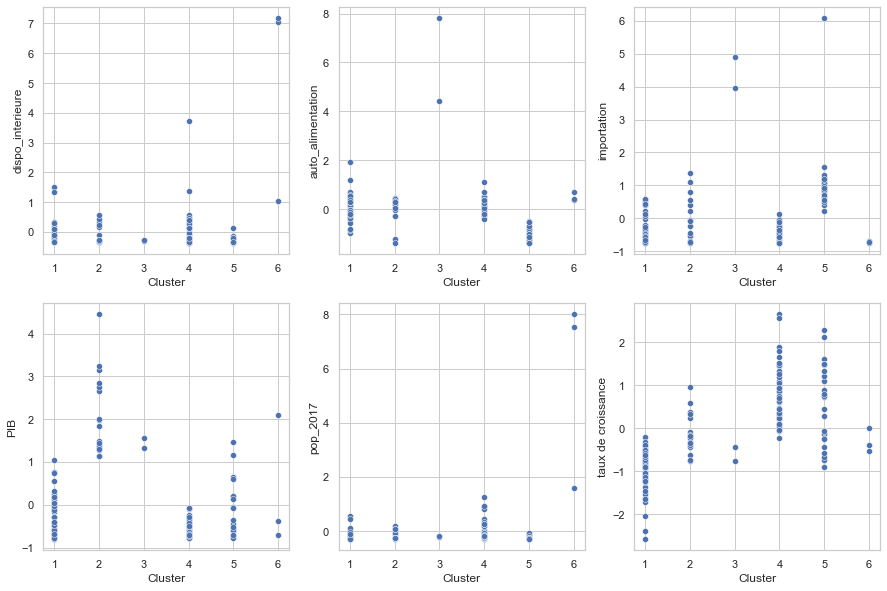

In [250]:
# graph des clusters
plt.figure(figsize=[15,10])
sns.set(style="whitegrid")

plt.subplot(231)
sns.scatterplot(x="Cluster", y="dispo_interieure", data=Cluster_s)

plt.subplot(232)
sns.scatterplot(x="Cluster", y="auto_alimentation", data=Cluster_s)

plt.subplot(233)
sns.scatterplot(x="Cluster", y="importation", data=Cluster_s)

plt.subplot(234)
sns.scatterplot(x="Cluster", y="PIB", data=Cluster_s)

plt.subplot(235)
sns.scatterplot(x="Cluster", y="pop_2017", data=Cluster_s)

plt.subplot(236)
sns.scatterplot(x="Cluster", y="taux de croissance", data=Cluster_s)

plt.show(block=False)

In [251]:
print(f"La disponibilité interieure est bien plus élevé dans le cluster 6 mais avec une très grande intervalle, le 1,2,4 ont une disponibilité très proche.")
print(f"Le cluster 3 se détache largement concernant l'auto alimentation, le cluster 5 est le plus bas, les autres sont proches les un des autres")
print(f"Le cluster 3 domine nettement les importations, le 5 arrive en deuxième position avec un pays très haut")
print(f"Le PIB par habitant est le plus élevé dans le cluster 2 ,puis le 3 les autres sont proches les uns des autres")
print(f"On voit le cluster 6 se détacher concernant la population par rapport aux autres")
print(f"Concernant le taux de croissance, les clusters 4 et 5 augmentent le plus")

La disponibilité interieure est bien plus élevé dans le cluster 6 mais avec une très grande intervalle, le 1,2,4 ont une disponibilité très proche.
Le cluster 3 se détache largement concernant l'auto alimentation, le cluster 5 est le plus bas, les autres sont proches les un des autres
Le cluster 3 domine nettement les importations, le 5 arrive en deuxième position avec un pays très haut
Le PIB par habitant est le plus élevé dans le cluster 2 ,puis le 3 les autres sont proches les uns des autres
On voit le cluster 6 se détacher concernant la population par rapport aux autres
Concernant le taux de croissance, les clusters 4 et 5 augmentent le plus


In [252]:
# corrélation
df_final1.corr()

,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance
dispo_interieure,1.000000,0.142032,-0.179971,0.090288,0.666203,-0.097349
auto_alimentation,0.142032,1.000000,0.029612,0.101823,0.107247,-0.160546
importation,-0.179971,0.029612,1.000000,0.268660,-0.157430,0.010622
PIB,0.090288,0.101823,0.268660,1.000000,-0.066855,-0.178185
pop_2017,0.666203,0.107247,-0.157430,-0.066855,1.000000,-0.016603
taux de croissance,-0.097349,-0.160546,0.010622,-0.178185,-0.016603,1.000000


<AxesSubplot:>

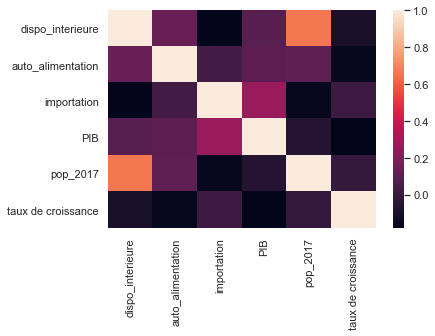

In [287]:
# heatmap de corrélation
sns.heatmap(df_final1.corr())

### Centroides des clusters par variable

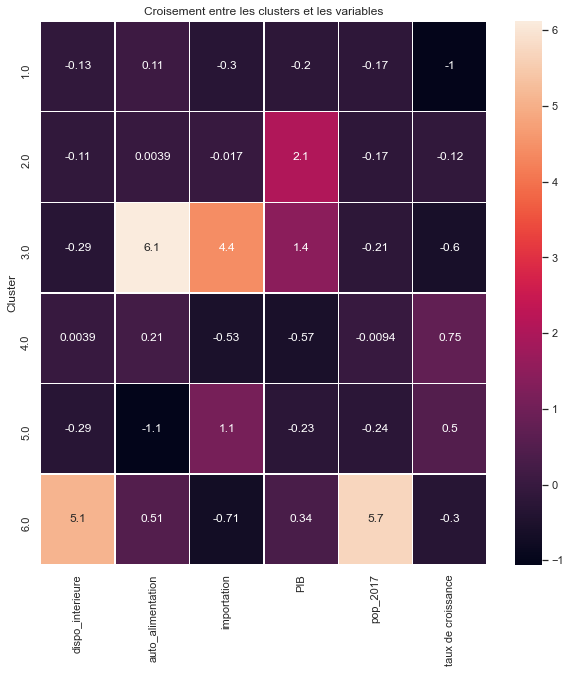

In [286]:
# heatmap 
df_k_final=df_final1.reset_index()
df_Cluster = pd.concat([Cluster_s, df_k_final.Zone], axis = 1)

df_Cluster_1 = df_Cluster.groupby("Cluster").mean()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_Cluster_1, annot = True, linewidths = .5, ax = ax)
plt.title("Croisement entre les clusters et les variables")
df_Cluster_1
plt.savefig("Heatmap de croisement clusters et variables.png")

## ACP

In [255]:
# importation des librairies pour l'Acp
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn import decomposition

In [256]:
# acp
PCA_decomposition = decomposition.PCA(svd_solver="full")
PCA_decomposition.fit(X_scaled)

PCA(svd_solver='full')

In [257]:
# affichage des variances
print(PCA_decomposition.explained_variance_ratio_)
print(PCA_decomposition.explained_variance_ratio_.sum())
print(PCA_decomposition.explained_variance_ratio_.cumsum())

[0.29867901 0.23215329 0.16372384 0.14318458 0.11082599 0.0514333 ]
1.0
[0.29867901 0.5308323  0.69455614 0.83774072 0.9485667  1.        ]


In [258]:
# recherche du nombre de dimensions
analyse_test = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(6)], 
        "Donnée" : PCA_decomposition.explained_variance_,
        "% variance expliquée" : np.round(PCA_decomposition.explained_variance_ratio_ * 100),
        "% cumsum variance expliquée" : np.round(np.cumsum(PCA_decomposition.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension",  "% variance expliquée", "% cumsum variance expliquée"]
)
analyse_test

,Dimension,% variance expliquée,% cumsum variance expliquée
0,Dim1,30.0,30.0
1,Dim2,23.0,53.0
2,Dim3,16.0,69.0
3,Dim4,14.0,84.0
4,Dim5,11.0,95.0
5,Dim6,5.0,100.0


Text(0.5, 0.98, 'Variance expliquée par dimension')

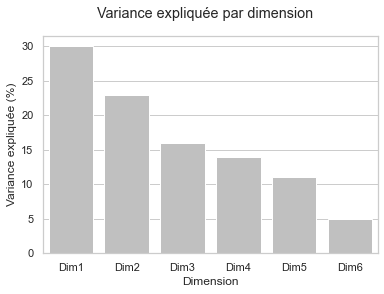

In [259]:
# graphique avec 6 dimensions
Poulet_graph = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["Silver"],
                data = analyse_test)
Poulet_graph.set(ylabel = "Variance expliquée (%)")
Poulet_graph.figure.suptitle("Variance expliquée par dimension")

#### Selon la loi de Pareto on peut prendre que 2 composantes

In [261]:
# acp
PCA_decomposition = decomposition.PCA(n_components = 2)
PCA_decomposition.fit(X_scaled)

PCA(n_components=2)

In [262]:
# affichage des variances
print(PCA_decomposition.explained_variance_ratio_)
print(PCA_decomposition.explained_variance_ratio_.sum())

[0.29867901 0.23215329]
0.5308323008688289


Text(0.5, 0.98, 'Variance expliquée par dimension')

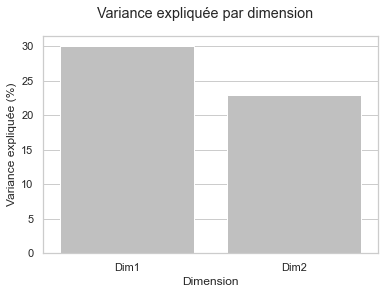

In [263]:
# acp final en 3 dimensions
acp_final = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(2)], 
        "Donnée" : PCA_decomposition.explained_variance_,
        "% variance expliquée" : np.round(PCA_decomposition.explained_variance_ratio_ * 100),
        "% cumsum variance expliquée" : np.round(np.cumsum(PCA_decomposition.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cumsum variance expliquée"]
)
acp_final
#
acp_final = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["Silver"],
                data = acp_final)
acp_final.set(ylabel = "Variance expliquée (%)")
acp_final.figure.suptitle("Variance expliquée par dimension")

In [264]:
# projection des données
Z_projected=PCA_decomposition.transform(X_scaled)
Z_projected

array([[ 4.00202895e-01, -5.63205180e-01],
       [-6.27673704e-01, -1.34749303e-02],
       [-3.70263040e-02, -1.01007904e+00],
       [ 3.67394378e-01,  1.26729505e+00],
       [-1.02914071e+00, -1.35201393e+00],
       [-1.03703778e+00,  5.07972334e-02],
       [-2.95169291e-01, -1.76031212e-01],
       [ 6.04135487e-01, -1.30655896e-01],
       [-7.17734997e-01, -5.07739353e-02],
       [ 2.32868050e-01,  1.00085229e+00],
       [-4.37955755e-01,  1.24722666e+00],
       [-2.54193881e-01, -5.59687230e-01],
       [-1.25932914e-01,  2.31974039e-01],
       [-4.04686717e-01,  4.61369228e+00],
       [-2.61600440e-01, -9.69398856e-01],
       [-3.20179391e-02, -8.70585176e-01],
       [ 1.14359820e-02,  2.60251437e-01],
       [-6.22327441e-01, -8.76092762e-01],
       [ 3.54646828e+00,  1.20315850e-01],
       [-3.03554920e-01,  5.29337995e-01],
       [ 1.75413791e-01,  4.65212613e-02],
       [-1.15086817e+00, -1.06280117e+00],
       [-2.26147660e-01, -1.35122297e+00],
       [ 3.

In [266]:
# affichage des 2 composantes
Z_projected2 = pd.DataFrame(
    {
        "Composante 1" : Z_projected [:,0], 
        "Composante 2" : Z_projected [:,1],
        
        
    },
    columns = ["Composante 1", "Composante 2"]
)
Z_projected2

,Composante 1,Composante 2
0,0.400203,-0.563205
1,-0.627674,-0.013475
2,-0.037026,-1.010079
3,0.367394,1.267295
4,-1.029141,-1.352014
...,...,...
129,0.350572,-1.054987
130,-1.056283,0.857374
131,-0.073940,-0.826918
132,6.173124,1.758323


In [267]:
# affichage du df avec les composantes
df_compo_final = pd.DataFrame(df_final1.index)
Z_projected2 = pd.concat([Z_projected2, df_compo_final], axis = 1)
Z_projected2

,Composante 1,Composante 2,Zone
0,0.400203,-0.563205,Afrique du Sud
1,-0.627674,-0.013475,Albanie
2,-0.037026,-1.010079,Algérie
3,0.367394,1.267295,Allemagne
4,-1.029141,-1.352014,Angola
...,...,...,...
129,0.350572,-1.054987,Égypte
130,-1.056283,0.857374,Émirats arabes unis
131,-0.073940,-0.826918,Équateur
132,6.173124,1.758323,États-Unis d'Amérique


In [268]:
Z_projected_cah=pd.concat([Z_projected2, cah["Cluster"]], axis = 1)
Z_projected_cah

,Composante 1,Composante 2,Zone,Cluster
0,0.400203,-0.563205,Afrique du Sud,6
1,-0.627674,-0.013475,Albanie,4
2,-0.037026,-1.010079,Algérie,6
3,0.367394,1.267295,Allemagne,3
4,-1.029141,-1.352014,Angola,4
...,...,...,...,...
129,0.350572,-1.054987,Égypte,6
130,-1.056283,0.857374,Émirats arabes unis,4
131,-0.073940,-0.826918,Équateur,6
132,6.173124,1.758323,États-Unis d'Amérique,1


In [269]:
Z_projected_sil=pd.concat([Z_projected2, df_kmean_sil["Cluster"]], axis = 1)
Z_projected_sil

,Composante 1,Composante 2,Zone,Cluster
0,0.400203,-0.563205,Afrique du Sud,4
1,-0.627674,-0.013475,Albanie,1
2,-0.037026,-1.010079,Algérie,4
3,0.367394,1.267295,Allemagne,2
4,-1.029141,-1.352014,Angola,5
...,...,...,...,...
129,0.350572,-1.054987,Égypte,4
130,-1.056283,0.857374,Émirats arabes unis,5
131,-0.073940,-0.826918,Équateur,4
132,6.173124,1.758323,États-Unis d'Amérique,6


In [270]:
centroide_kmean=Z_projected_sil.groupby("Cluster")[["Composante 1","Composante 2"]].mean().reset_index()
centroide_kmean

,Cluster,Composante 1,Composante 2
0,1,0.055756,0.232214
1,2,-0.185430,1.405906
2,3,-0.117226,5.636944
3,4,0.089650,-0.871447
4,5,-0.965055,-0.261069
5,6,7.397273,0.068052


C:\Users\seb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


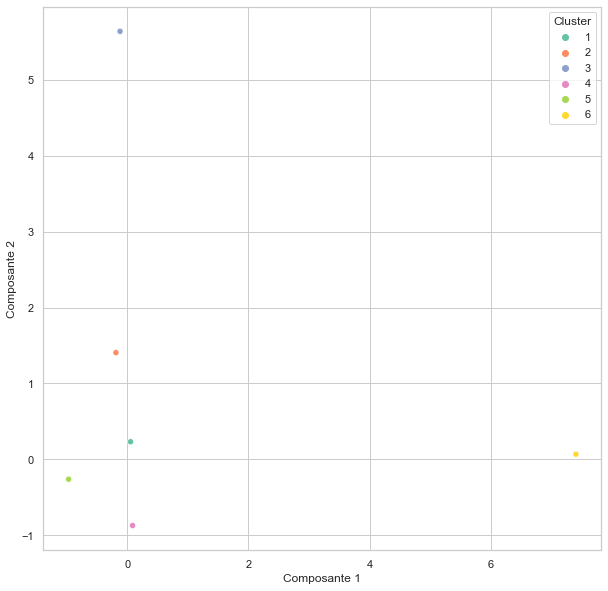

In [272]:
# visualisation des centroides
plt.figure(figsize=[10,10])
sns.scatterplot("Composante 1","Composante 2", data=centroide_kmean, hue=centroide_kmean["Cluster"], palette="Set2")
plt.show()

C:\Users\seb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


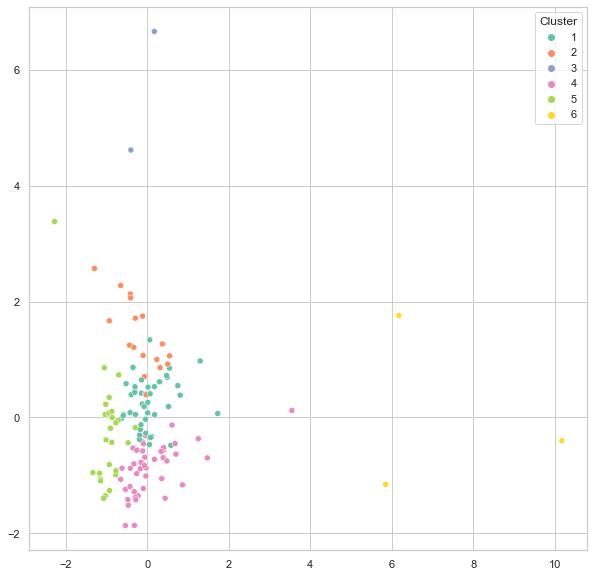

In [273]:
# visualisation des clusters
plt.figure(figsize=[10,10])
sns.scatterplot(Z_projected[:, 0], Z_projected[:, 1], hue=Cluster_s['Cluster'], palette="Set2")
plt.show()

In [276]:
pcs=PCA_decomposition.components_

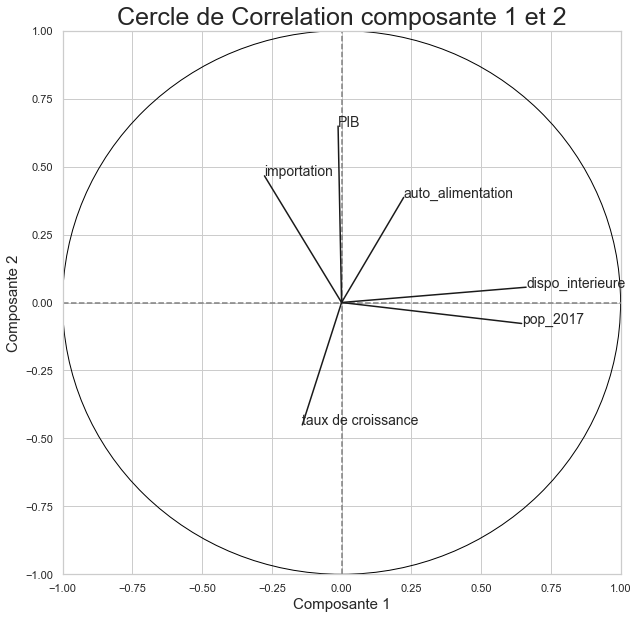

In [277]:
# Visu du cercle de corrélation % variance expliquée et de la Valeur propre :
Pca_test = PCA_decomposition.components_

fig,ax = plt.subplots(figsize=(10,10))

# Afficher une ligne horizontale x = 0
plt.plot([-1, 1], [0, 0], color = 'grey', ls='--')

# Afficher une ligne verticale y = 0
plt.plot([0, 0], [-1, 1], color = 'grey', ls='--')

# Affichage d un cercle 
cercle = plt.Circle((0,0),1, color='black', fill=False)

ax.add_artist(cercle)

plt.xlim([-1, 1])
plt.ylim([-1, 1])

# Variable de l ACP
for n, (x, y) in enumerate(zip(Pca_test[0, :],Pca_test[1, :])) :
    
    # Afficher un segment de l origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom de la perf
    plt.text(x, y, df_final1.columns[n], fontsize='14')

    
plt.xlabel('Composante 1', fontsize = 15)
plt.ylabel('Composante 2', fontsize = 15)
plt.title(' Cercle de Correlation composante 1 et 2 ', fontsize = 25)
plt.grid(True)
plt.show()

### Sélection des pays via le CAH

In [278]:
# affichage des deux clusters retenus
pays_interessant_cah=cah[(cah["Cluster"]==3)|(cah["Cluster"]==4)]
pays_interessant_cah

,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
1,3,Albanie,Europe,55000.0,23.6,69.1,4514.20,2884169.0,-0.05,4
3,79,Allemagne,Europe,1681000.0,90.1,50.1,44552.06,82658409.0,0.56,3
4,7,Angola,Afrique,319000.0,13.2,86.8,4095.81,29816766.0,3.33,4
5,8,Antigua-et-Barbuda,AmNord,7000.0,0.0,100.0,15383.42,95426.0,0.90,4
6,194,Arabie saoudite,Afrique,1220000.0,50.5,59.2,20802.47,33101179.0,1.82,4
8,1,Arménie,Europe,44000.0,25.0,79.5,3914.53,2944791.0,0.24,4
9,10,Australie,Oceanie,1314000.0,96.6,1.2,57628.86,24584620.0,1.28,3
10,11,Autriche,Europe,188000.0,78.7,58.5,47306.41,8819901.0,0.81,3
21,53,Bénin,Afrique,121000.0,14.9,101.7,1136.59,11175198.0,2.77,4
23,33,Canada,AmNord,1439000.0,98.5,12.6,44906.75,36732095.0,0.93,3


In [279]:
# exclusion des taux d'importation inférieur a 30%
pays_interessant_cah=pays_interessant_cah[pays_interessant_cah["importation"]>=30]
print(f"Il y a {len(pays_interessant_cah)} pays potentiels")
pays_interessant_cah

Il y a 42 pays potentiels


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
1,3,Albanie,Europe,55000.0,23.6,69.1,4514.20,2884169.0,-0.05,4
3,79,Allemagne,Europe,1681000.0,90.1,50.1,44552.06,82658409.0,0.56,3
4,7,Angola,Afrique,319000.0,13.2,86.8,4095.81,29816766.0,3.33,4
5,8,Antigua-et-Barbuda,AmNord,7000.0,0.0,100.0,15383.42,95426.0,0.90,4
6,194,Arabie saoudite,Afrique,1220000.0,50.5,59.2,20802.47,33101179.0,1.82,4
8,1,Arménie,Europe,44000.0,25.0,79.5,3914.53,2944791.0,0.24,4
10,11,Autriche,Europe,188000.0,78.7,58.5,47306.41,8819901.0,0.81,3
21,53,Bénin,Afrique,121000.0,14.9,101.7,1136.59,11175198.0,2.77,4
25,96,Chine - RAS de Hong-Kong,Asie,256000.0,9.4,354.3,46705.03,7306322.0,0.90,4
26,128,Chine - RAS de Macao,Asie,34000.0,8.8,67.6,81516.66,622585.0,1.45,3


### Sélection des pays via le Kmeans

In [281]:
# affichage des clusters retenus
pays_interessant_kmean=df_kmean_sil[(df_kmean_sil["Cluster"]==2)|(df_kmean_sil["Cluster"]==5)]
pays_interessant_kmean

,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
3,79,Allemagne,Europe,1681000.0,90.1,50.1,44552.06,82658409.0,0.56,2
4,7,Angola,Afrique,319000.0,13.2,86.8,4095.81,29816766.0,3.33,5
5,8,Antigua-et-Barbuda,AmNord,7000.0,0.0,100.0,15383.42,95426.0,0.90,5
6,194,Arabie saoudite,Afrique,1220000.0,50.5,59.2,20802.47,33101179.0,1.82,5
8,1,Arménie,Europe,44000.0,25.0,79.5,3914.53,2944791.0,0.24,5
9,10,Australie,Oceanie,1314000.0,96.6,1.2,57628.86,24584620.0,1.28,2
10,11,Autriche,Europe,188000.0,78.7,58.5,47306.41,8819901.0,0.81,2
21,53,Bénin,Afrique,121000.0,14.9,101.7,1136.59,11175198.0,2.77,5
23,33,Canada,AmNord,1439000.0,98.5,12.6,44906.75,36732095.0,0.93,2
25,96,Chine - RAS de Hong-Kong,Asie,256000.0,9.4,354.3,46705.03,7306322.0,0.90,5


In [282]:
# exclusion des pays avec un taux d'importation inférieur à 30%
pays_interessant_kmean=pays_interessant_kmean[pays_interessant_kmean["importation"]>=30]
print(f"Il y a {len(pays_interessant_cah)} pays potentiels")
pays_interessant_kmean

Il y a 42 pays potentiels


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
3,79,Allemagne,Europe,1681000.0,90.1,50.1,44552.06,82658409.0,0.56,2
4,7,Angola,Afrique,319000.0,13.2,86.8,4095.81,29816766.0,3.33,5
5,8,Antigua-et-Barbuda,AmNord,7000.0,0.0,100.0,15383.42,95426.0,0.90,5
6,194,Arabie saoudite,Afrique,1220000.0,50.5,59.2,20802.47,33101179.0,1.82,5
8,1,Arménie,Europe,44000.0,25.0,79.5,3914.53,2944791.0,0.24,5
10,11,Autriche,Europe,188000.0,78.7,58.5,47306.41,8819901.0,0.81,2
21,53,Bénin,Afrique,121000.0,14.9,101.7,1136.59,11175198.0,2.77,5
25,96,Chine - RAS de Hong-Kong,Asie,256000.0,9.4,354.3,46705.03,7306322.0,0.90,5
26,128,Chine - RAS de Macao,Asie,34000.0,8.8,67.6,81516.66,622585.0,1.45,2
31,46,Congo,Afrique,111000.0,6.3,93.7,2154.63,5110695.0,2.62,5


#### On peut voir que selon nos variables et nos analyses 42 pays sont intéressants pour exporter nos poulets, que ce soit via l'analyse du Dendrogramme et via l'analyse des Kmeans

In [283]:
# jointure des deux sélections
pays_a_suivre=pd.merge(pays_interessant_cah, pays_interessant_kmean["Zone"], on=["Zone"])
print(f"En combinant nos deux clustering, on retrouve {len(pays_a_suivre)} pays potentiels")
pays_a_suivre

En combinant nos deux clustering, on retrouve 35 pays potentiels


,Code zone,Zone,Continent,dispo_interieure,auto_alimentation,importation,PIB,pop_2017,taux de croissance,Cluster
0,79,Allemagne,Europe,1681000.0,90.1,50.1,44552.06,82658409.0,0.56,3
1,7,Angola,Afrique,319000.0,13.2,86.8,4095.81,29816766.0,3.33,4
2,8,Antigua-et-Barbuda,AmNord,7000.0,0.0,100.0,15383.42,95426.0,0.90,4
3,194,Arabie saoudite,Afrique,1220000.0,50.5,59.2,20802.47,33101179.0,1.82,4
4,1,Arménie,Europe,44000.0,25.0,79.5,3914.53,2944791.0,0.24,4
5,11,Autriche,Europe,188000.0,78.7,58.5,47306.41,8819901.0,0.81,3
6,53,Bénin,Afrique,121000.0,14.9,101.7,1136.59,11175198.0,2.77,4
7,96,Chine - RAS de Hong-Kong,Asie,256000.0,9.4,354.3,46705.03,7306322.0,0.90,4
8,128,Chine - RAS de Macao,Asie,34000.0,8.8,67.6,81516.66,622585.0,1.45,3
9,46,Congo,Afrique,111000.0,6.3,93.7,2154.63,5110695.0,2.62,4


#### Dans cette liste de 35 pays on peut retirer l'Arabie Saoudite et l'Iraq qui peuvent être compliqués avec leur situation politique, Il me semble aussi que les îles d'Amérique du Nord et d'Océanie peuvent être compliqués à approvisionner dans un premier temps